<a href="https://colab.research.google.com/github/aby-rl/redes/blob/main/Redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A3.2 Redes neuronales**

***

**1.** Se importan las librerías necesarias para comenzar con la exploración de los datos. Primero se revisa la cantidad de imágenes y tamaños. Luego la proporción de clases. Así mismo, la impresión de algunas imágenes de la base de datos y el rango de valores de pixeles.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


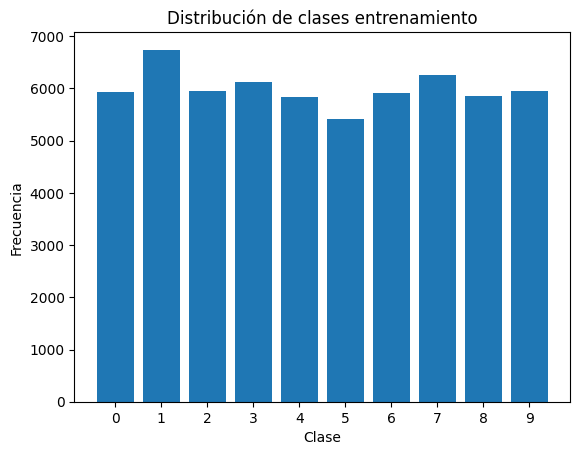

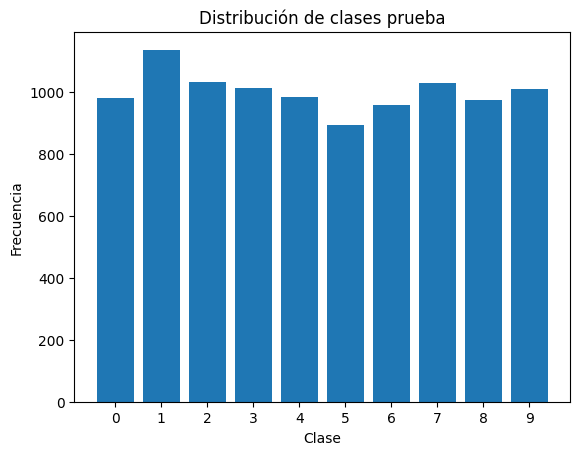

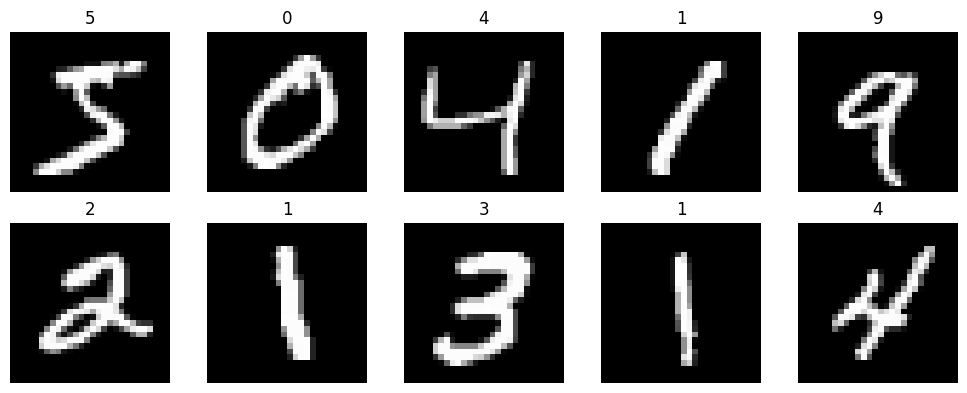

Val min pixel en entrenamiento 0
Val max pixel en entrenamiento 255
Val min pixel en prueba 0
Val max pixel en prueba 255


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#Cantidad de imágenes y tamaños
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

#Proporción de clases
unique, counts= np.unique(train_labels, return_counts=True)
plt.bar(unique, counts, tick_label=unique)
plt.title('Distribución de clases entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

unique, counts= np.unique(test_labels, return_counts=True)
plt.bar(unique, counts, tick_label=unique)
plt.title('Distribución de clases prueba')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

#Mostrar imágenes
plt.figure(figsize=(10,4))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(train_labels[i])
  plt.axis('off')
plt.tight_layout()
plt.show()

#Rango de valores de pixeles
print('Val min pixel en entrenamiento',train_images.min())
print('Val max pixel en entrenamiento',train_images.max())
print('Val min pixel en prueba',test_images.min())
print('Val max pixel en prueba',test_images.max())

***

**2.** Se importan librerias adicionales para el modelo utilizando distintas funciones de activación. Posterior a esto se imprime un resumen de la red neuronal, mostrando los pixeles como la cantidad de neuronas por cada capa generada.

Como **mejora** en lugar de utilizar SGD, se utiliza el optimizador Adam para lograr un entrenamiento más rápido, estable y eficiente.

In [ ]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

#Feedforward neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential([Input(shape=(28, 28)),Flatten(),Dense(128, activation='relu'),Dense(10, activation='softmax')])

opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

#784 pixeles
#capa 128 neuronas
#capa salida 10 neuronas
#784*128+128=100480
#param es cantidad de coef

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

***

**3.** Se entrena el modelo con una proporción 70/30. Adicional a esto se establece el parámetro de paciencia a 8 con 50 epochs, especificando que el modelo termine cuando lo validación no mejore en 8 épocas consecutivas.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=8,restore_best_weights=True)

history = model.fit(train_images, train_labels, epochs=50, validation_split=0.3, callbacks=[early_stopping])

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8518 - loss: 0.5126 - val_accuracy: 0.9479 - val_loss: 0.1808
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9547 - loss: 0.1510 - val_accuracy: 0.9589 - val_loss: 0.1430
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9712 - loss: 0.0982 - val_accuracy: 0.9674 - val_loss: 0.1118
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9790 - loss: 0.0700 - val_accuracy: 0.9688 - val_loss: 0.1039
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9855 - loss: 0.0498 - val_accuracy: 0.9683 - val_loss: 0.1058
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9891 - loss: 0.0372 - val_accuracy: 0.9677 - val_loss: 0.1071
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9906 - loss: 0.0306 - val_accuracy: 0.9714 - val_loss: 0.1023
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9927 - loss: 0.0245 

***

**4.** Se determina la época óptima donde *EarlyStopping* restaura los mejores pesos. Se grafica el accuracy y loss tanto en entrenamiento como en validación. Luego, la línea punteada indica el momento donde se detuvo. Finalmente, se muestra la exactitud final alcanzada, de igual manera en entrenamiento y validación.

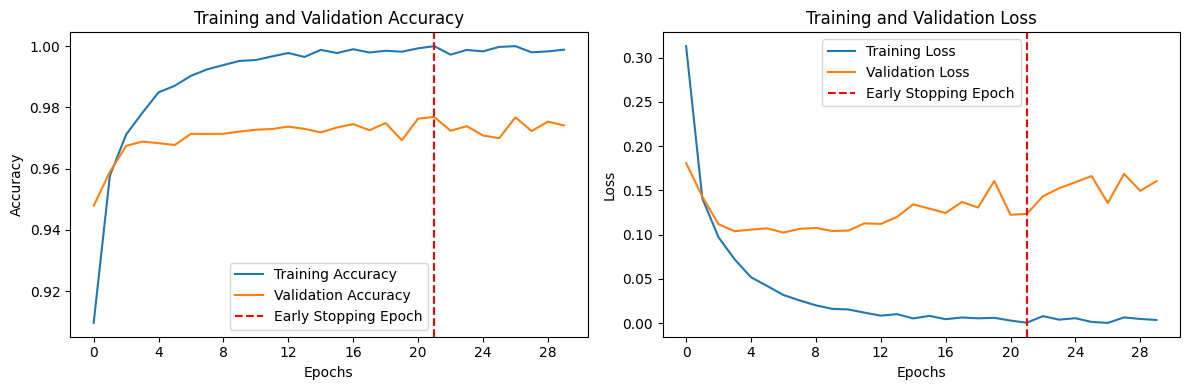

Final Training Accuracy:  1.0
Final Validation Accuracy: 0.97688889503479


In [ ]:
#no esta sobreajustado por la diferencia de los resultados en el accuracy

from matplotlib.ticker import MaxNLocator
stopped_epoch = early_stopping.stopped_epoch
best_epoch = stopped_epoch - early_stopping.patience
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping Epoch')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping Epoch')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()

plt.tight_layout()
plt.show()

final_train_acc = history.history['accuracy'][best_epoch]
final_val_acc = history.history['val_accuracy'][best_epoch]
print("Final Training Accuracy: ",final_train_acc)
print("Final Validation Accuracy:",final_val_acc)

***

**5.** Se evalúa la exactitud del modelo en el conjunto de prueba generado al cargar la base de datos. Además, se compara con la exactitud de validación del modelo.

En este caso es posible ver que la exactitud del modelo (0.98) es mayor/similar a la de validación (0.9768) por lo que tiene un buen desempeño y no indica índices de sobreajuste.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

print("\nComparación:")
if test_acc > final_val_acc:
    print("- El modelo generaliza bien")
else:
    print("- Puede haber ligero overfitting")

Test Accuracy: 0.9800

Comparación:
- El modelo generaliza bien


***

**6.** Se habilita una función para capturar una imágen utilizando la cámara de colab, posterior se guarda la foto como archivo.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
def take_photo(filename='photo.jpg', quality=0.9):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

***

**7.** Para generar las 50 imágenes, 5 para cada dígito, en cada una se lee la imágen y convierte a escala de grises.

Como **mejoras adicionales** se aplica:
* Desenfoque y umbralización
* Encuentra el contorno más grande, ubicando de mejor manera el dígito.
* Se centra el dígito en un lienzo de 28 x 28
* Se normaliza la imagen [0,1]

Posterior al procesamiento se realiza una visualización de la imagen original, umbralizada y reescalada a 28 x 28.

Para cada una de ellas también se hace una predicción del número capturado.

Finalmente, se evalúa qué tan bien predice el modelo en las 50 imágenes nuevas.


--- Vamos a capturar 5 imágenes de cada dígito (0 al 9) ---


Dibuja el número 0 en una hoja y vamos a capturar 5 imágenes:

Presiona Enter para capturar imagen 1 del dígito 0...


<IPython.core.display.Javascript object>

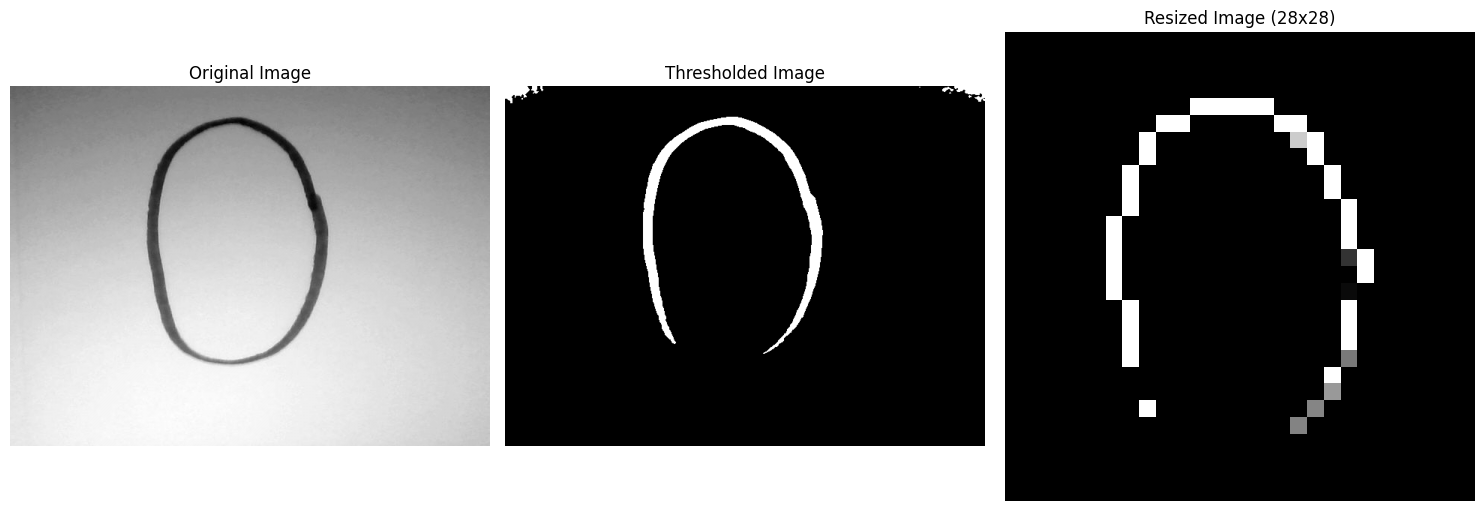

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Digit | Probability
-------------------
  0   |   0.63354
  1   |   0.00437
  2   |   0.15804
  3   |   0.00624
  4   |   0.03065
  5   |   0.00050
  6   |   0.00442
  7   |   0.10935
  8   |   0.01983
  9   |   0.03305
Predicción del modelo: 0
Etiqueta correcta: 0
Imagen 1 del dígito 0 capturada y preprocesada.


Presiona Enter para capturar imagen 2 del dígito 0...


<IPython.core.display.Javascript object>

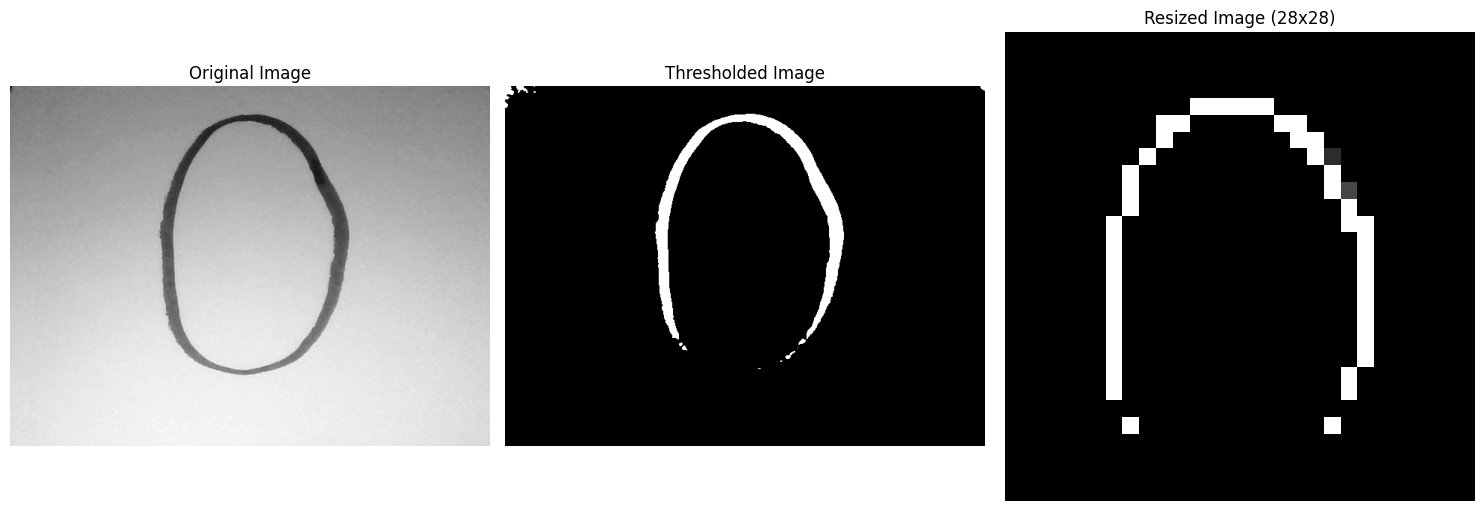

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Digit | Probability
-------------------
  0   |   0.53270
  1   |   0.00631
  2   |   0.22889
  3   |   0.00442
  4   |   0.11947
  5   |   0.00065
  6   |   0.00493
  7   |   0.04450
  8   |   0.04780
  9   |   0.01032
Predicción del modelo: 0
Etiqueta correcta: 0
Imagen 2 del dígito 0 capturada y preprocesada.


Presiona Enter para capturar imagen 3 del dígito 0...


<IPython.core.display.Javascript object>

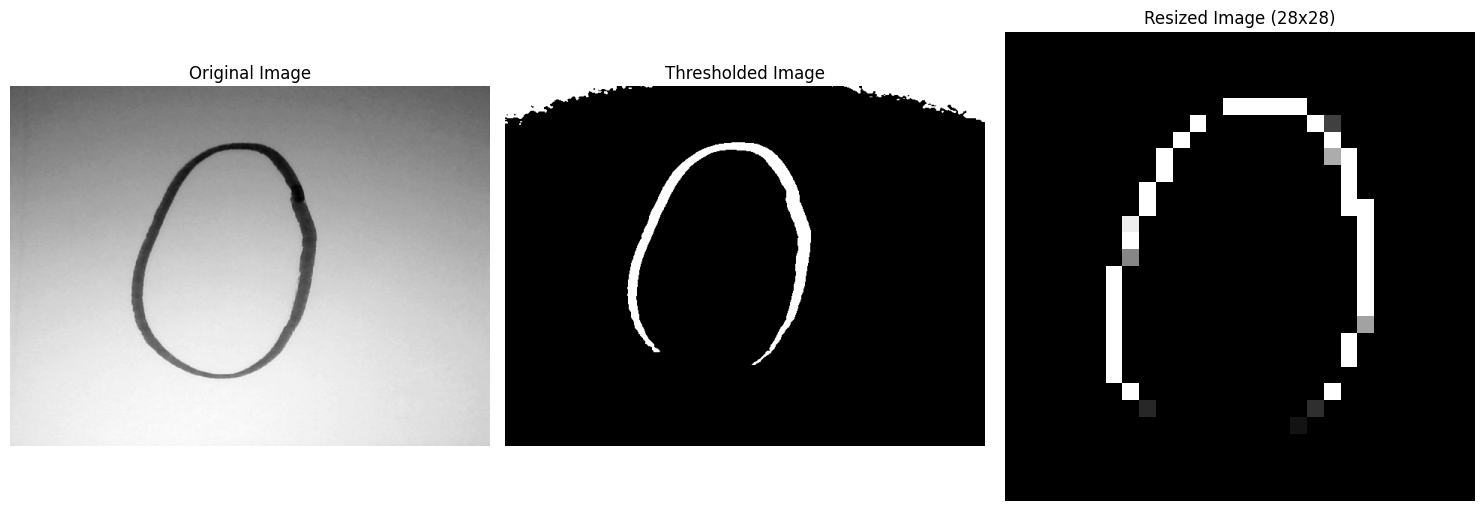

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Digit | Probability
-------------------
  0   |   0.57142
  1   |   0.00228
  2   |   0.05114
  3   |   0.00730
  4   |   0.13233
  5   |   0.00180
  6   |   0.00524
  7   |   0.12656
  8   |   0.03853
  9   |   0.06341
Predicción del modelo: 0
Etiqueta correcta: 0
Imagen 3 del dígito 0 capturada y preprocesada.


Presiona Enter para capturar imagen 4 del dígito 0...


<IPython.core.display.Javascript object>

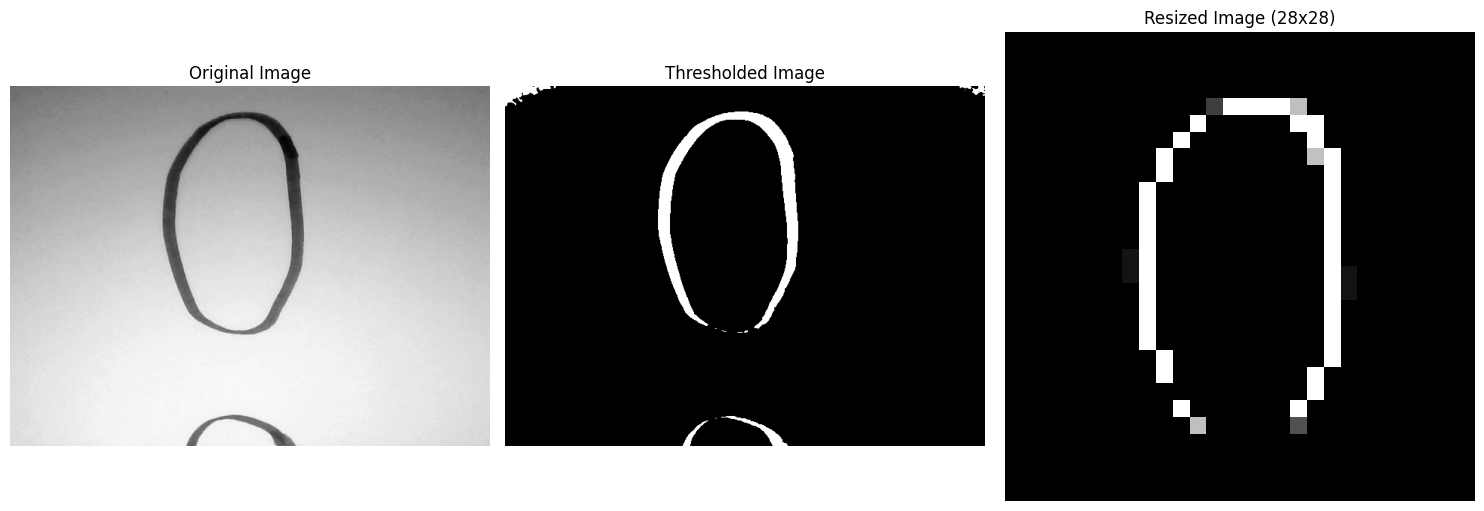

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Digit | Probability
-------------------
  0   |   0.46647
  1   |   0.00110
  2   |   0.07075
  3   |   0.00654
  4   |   0.10974
  5   |   0.00011
  6   |   0.00267
  7   |   0.13397
  8   |   0.04314
  9   |   0.16551
Predicción del modelo: 0
Etiqueta correcta: 0
Imagen 4 del dígito 0 capturada y preprocesada.


Presiona Enter para capturar imagen 5 del dígito 0...


<IPython.core.display.Javascript object>

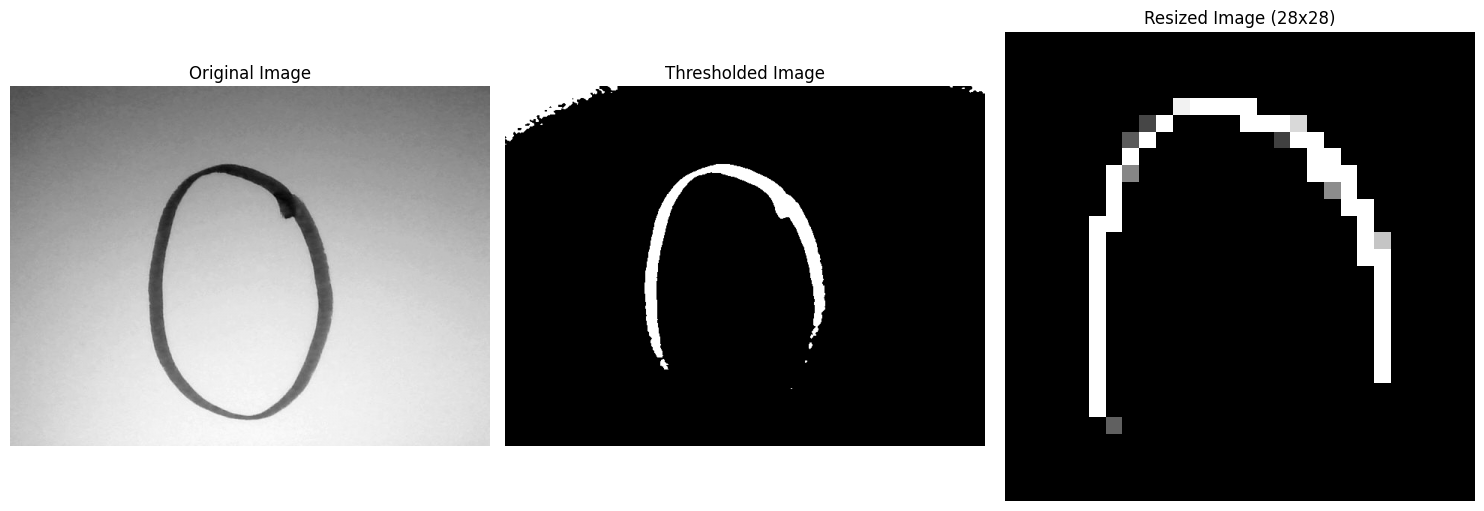

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Digit | Probability
-------------------
  0   |   0.80206
  1   |   0.00033
  2   |   0.00826
  3   |   0.00043
  4   |   0.01024
  5   |   0.00006
  6   |   0.00046
  7   |   0.10584
  8   |   0.01165
  9   |   0.06065
Predicción del modelo: 0
Etiqueta correcta: 0
Imagen 5 del dígito 0 capturada y preprocesada.


Dibuja el número 1 en una hoja y vamos a capturar 5 imágenes:

Presiona Enter para capturar imagen 1 del dígito 1...


<IPython.core.display.Javascript object>

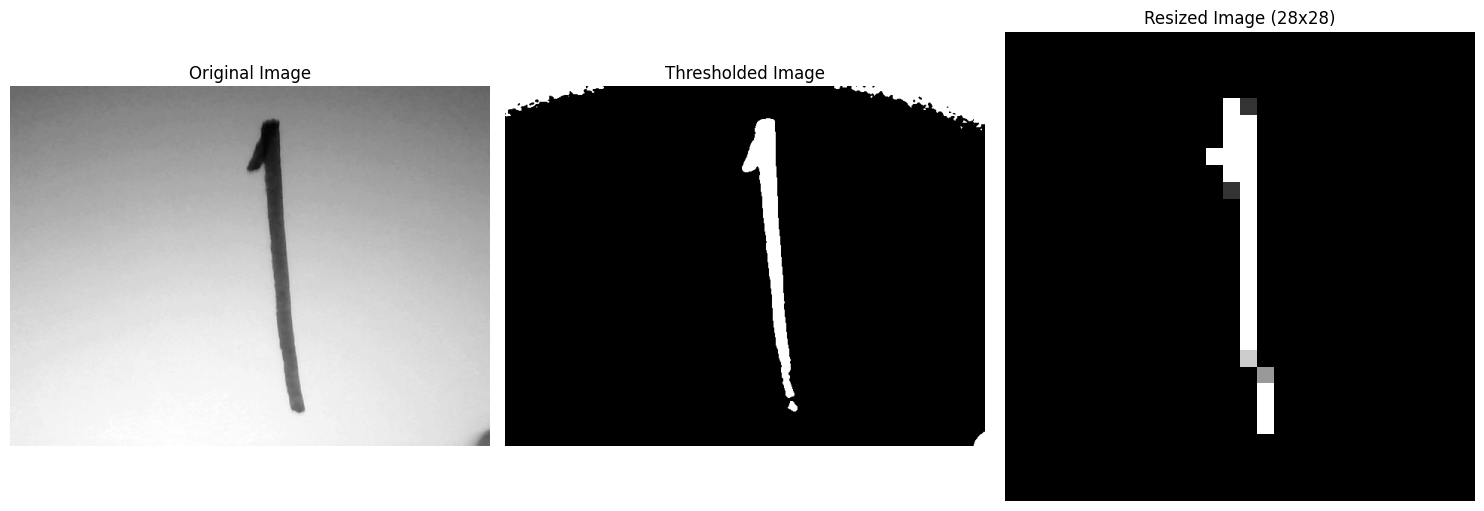

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.97488
  2   |   0.00094
  3   |   0.01040
  4   |   0.00005
  5   |   0.00087
  6   |   0.00007
  7   |   0.01038
  8   |   0.00231
  9   |   0.00009
Predicción del modelo: 1
Etiqueta correcta: 1
Imagen 1 del dígito 1 capturada y preprocesada.


Presiona Enter para capturar imagen 2 del dígito 1...


<IPython.core.display.Javascript object>

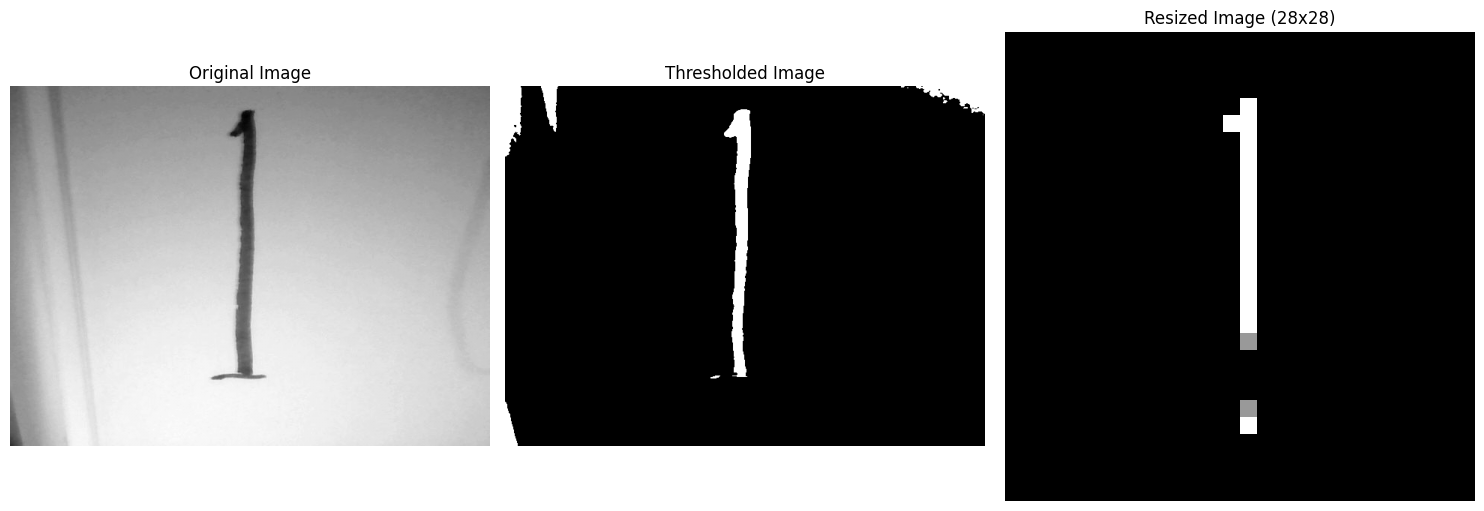

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Digit | Probability
-------------------
  0   |   0.00001
  1   |   0.97363
  2   |   0.00063
  3   |   0.00351
  4   |   0.00476
  5   |   0.00167
  6   |   0.00043
  7   |   0.00410
  8   |   0.00951
  9   |   0.00174
Predicción del modelo: 1
Etiqueta correcta: 1
Imagen 2 del dígito 1 capturada y preprocesada.


Presiona Enter para capturar imagen 3 del dígito 1...


<IPython.core.display.Javascript object>

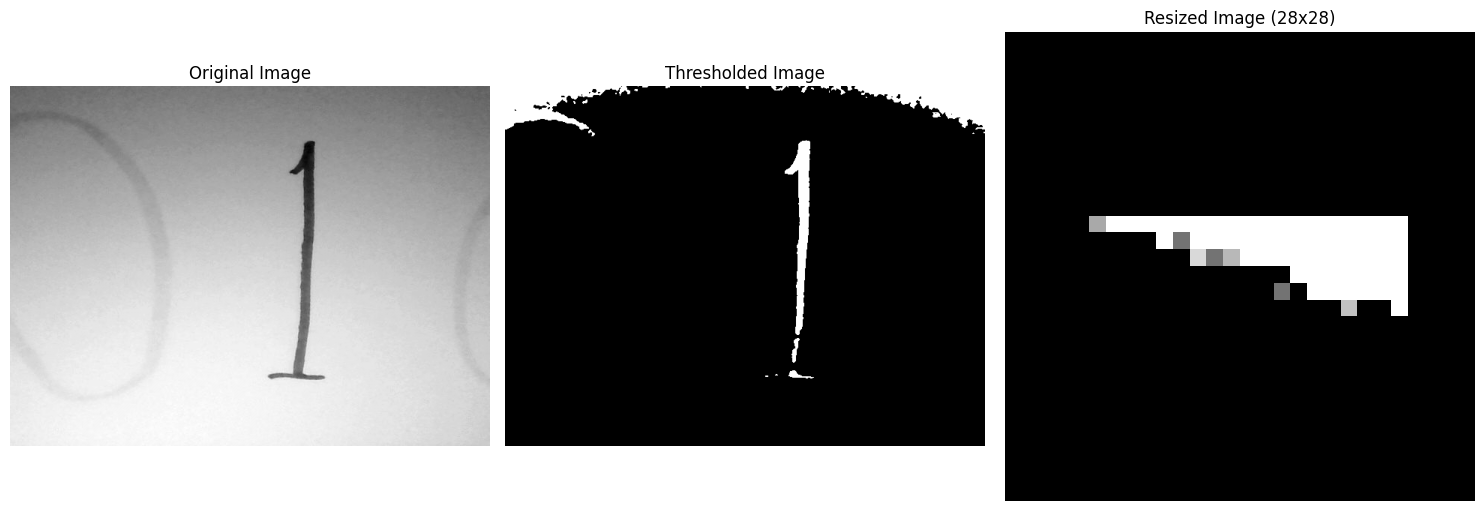

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00001
  3   |   0.00000
  4   |   0.00051
  5   |   0.00058
  6   |   0.00000
  7   |   0.99851
  8   |   0.00006
  9   |   0.00034
Predicción del modelo: 7
Etiqueta correcta: 1
Imagen 3 del dígito 1 capturada y preprocesada.


Presiona Enter para capturar imagen 4 del dígito 1...


<IPython.core.display.Javascript object>

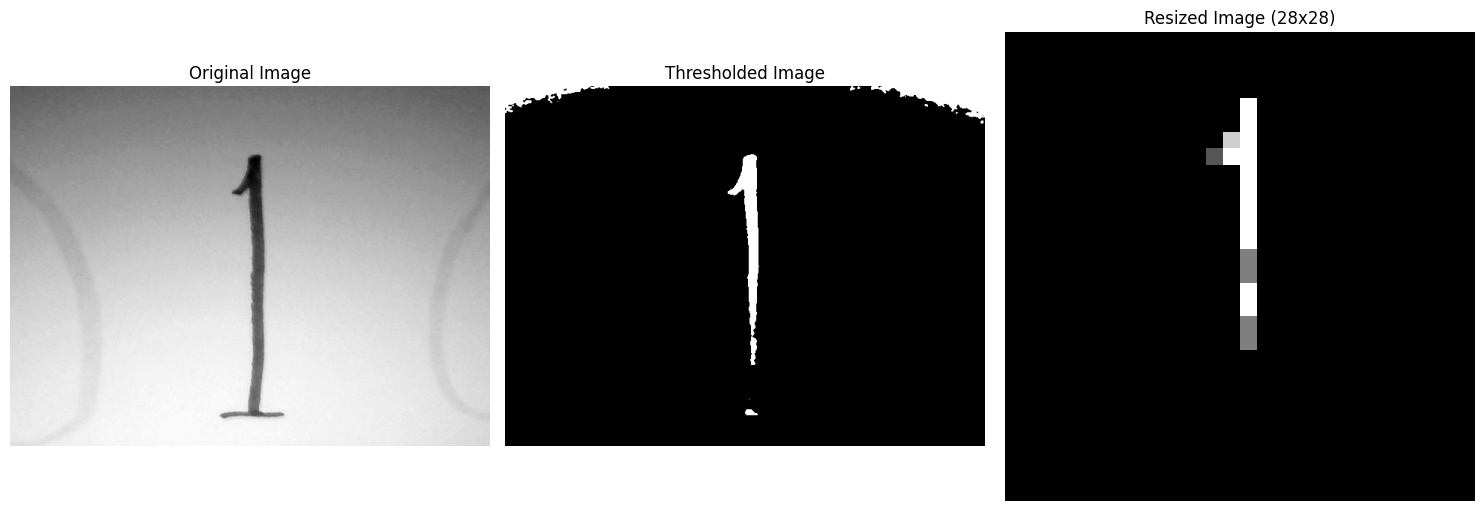

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Digit | Probability
-------------------
  0   |   0.00023
  1   |   0.78887
  2   |   0.00565
  3   |   0.05499
  4   |   0.00934
  5   |   0.01167
  6   |   0.00114
  7   |   0.08986
  8   |   0.02561
  9   |   0.01263
Predicción del modelo: 1
Etiqueta correcta: 1
Imagen 4 del dígito 1 capturada y preprocesada.


Presiona Enter para capturar imagen 5 del dígito 1...


<IPython.core.display.Javascript object>

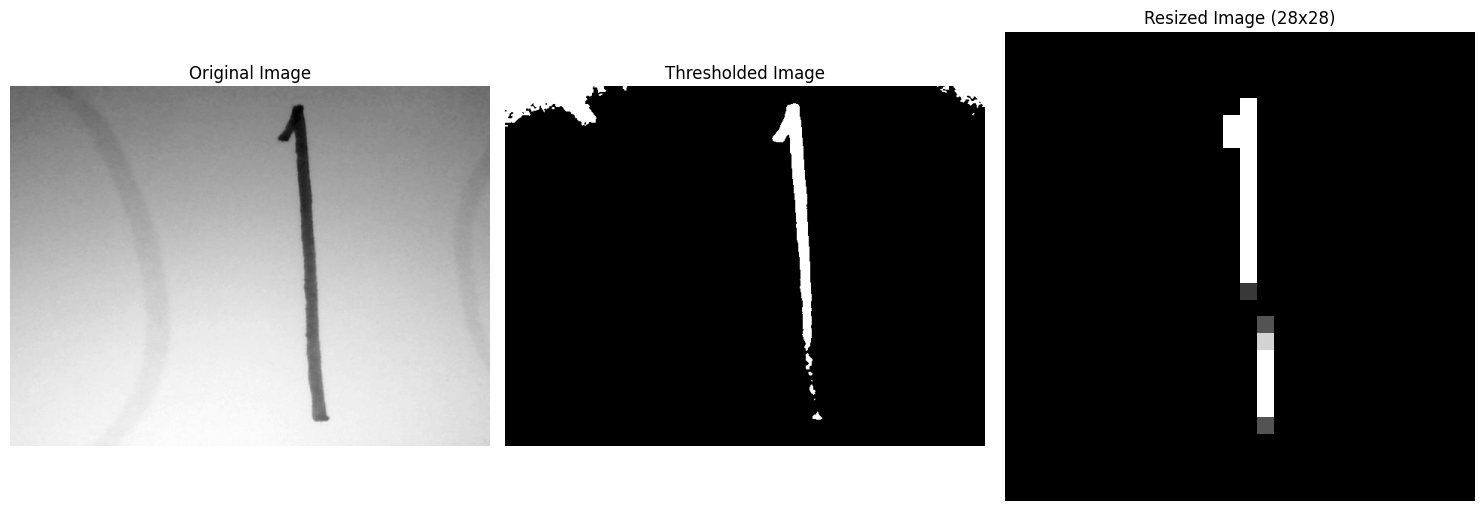

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Digit | Probability
-------------------
  0   |   0.00017
  1   |   0.73152
  2   |   0.00437
  3   |   0.19422
  4   |   0.00031
  5   |   0.03976
  6   |   0.00058
  7   |   0.01712
  8   |   0.01092
  9   |   0.00102
Predicción del modelo: 1
Etiqueta correcta: 1
Imagen 5 del dígito 1 capturada y preprocesada.


Dibuja el número 2 en una hoja y vamos a capturar 5 imágenes:

Presiona Enter para capturar imagen 1 del dígito 2...


<IPython.core.display.Javascript object>

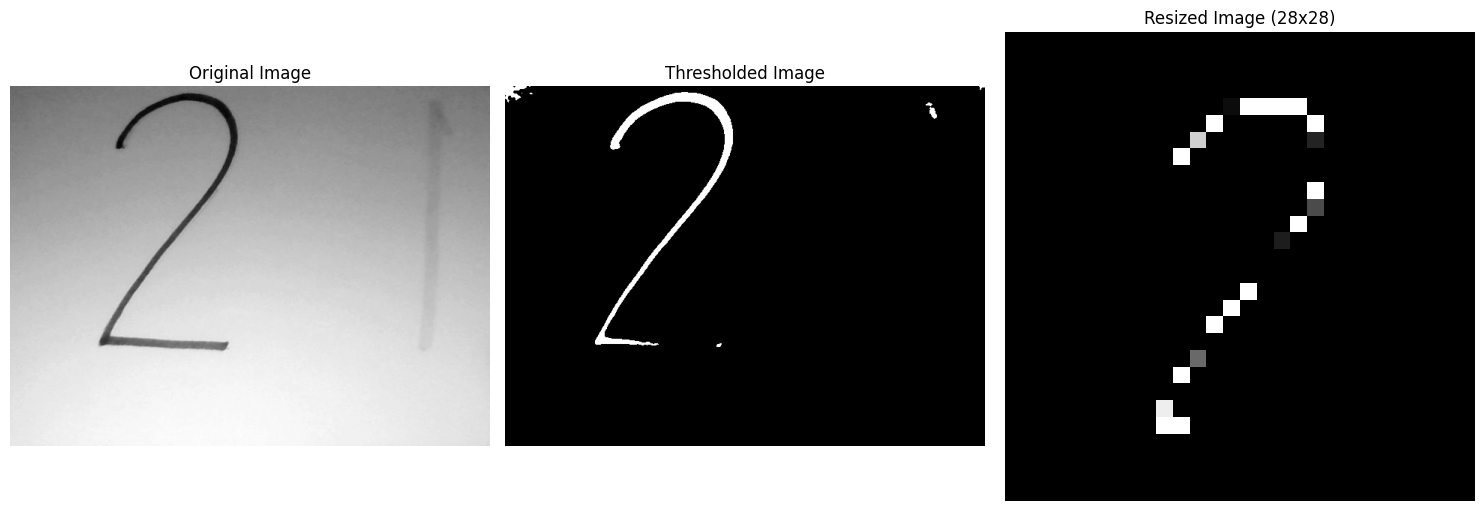

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Digit | Probability
-------------------
  0   |   0.02731
  1   |   0.08634
  2   |   0.41392
  3   |   0.11310
  4   |   0.00833
  5   |   0.01387
  6   |   0.00189
  7   |   0.01767
  8   |   0.30710
  9   |   0.01048
Predicción del modelo: 2
Etiqueta correcta: 2
Imagen 1 del dígito 2 capturada y preprocesada.


Presiona Enter para capturar imagen 2 del dígito 2...


<IPython.core.display.Javascript object>

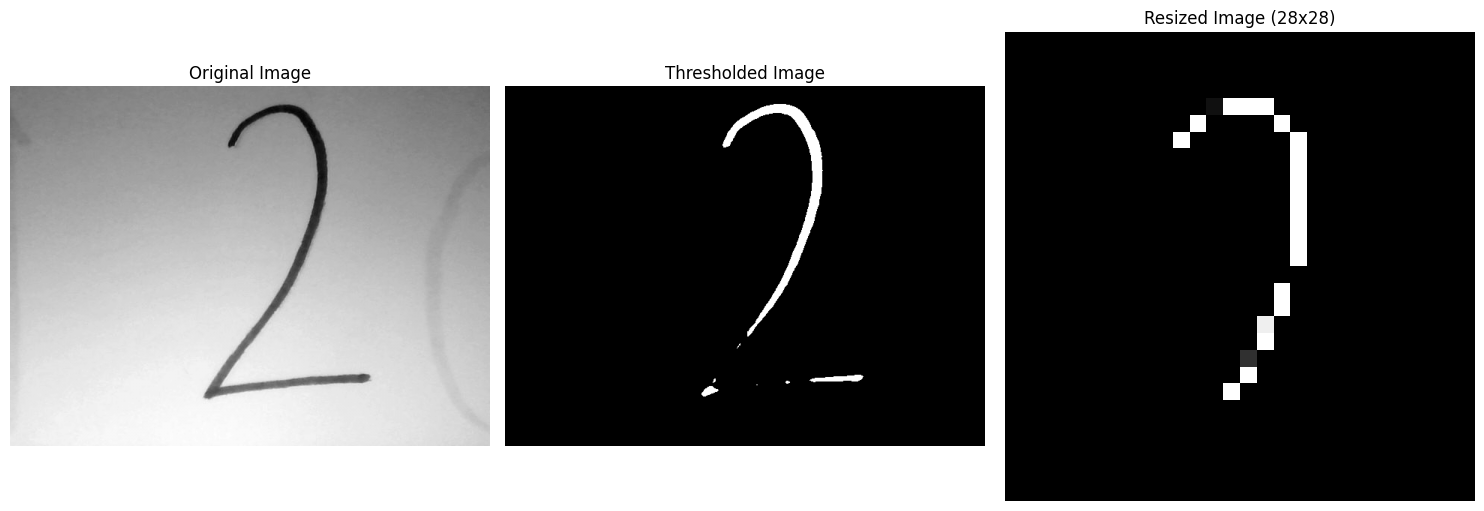

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Digit | Probability
-------------------
  0   |   0.03457
  1   |   0.27752
  2   |   0.12704
  3   |   0.18753
  4   |   0.04015
  5   |   0.00286
  6   |   0.00109
  7   |   0.26283
  8   |   0.05019
  9   |   0.01623
Predicción del modelo: 1
Etiqueta correcta: 2
Imagen 2 del dígito 2 capturada y preprocesada.


Presiona Enter para capturar imagen 3 del dígito 2...


<IPython.core.display.Javascript object>

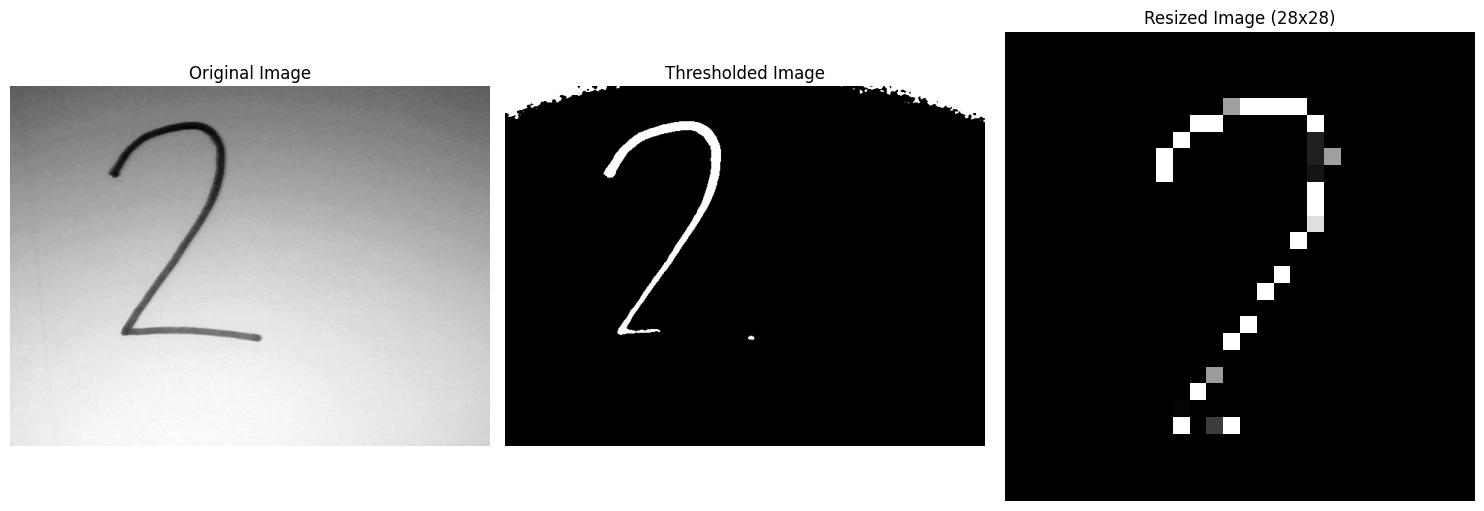

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Digit | Probability
-------------------
  0   |   0.03383
  1   |   0.09924
  2   |   0.35135
  3   |   0.24721
  4   |   0.03920
  5   |   0.00260
  6   |   0.00034
  7   |   0.06527
  8   |   0.14399
  9   |   0.01696
Predicción del modelo: 2
Etiqueta correcta: 2
Imagen 3 del dígito 2 capturada y preprocesada.


Presiona Enter para capturar imagen 4 del dígito 2...


<IPython.core.display.Javascript object>

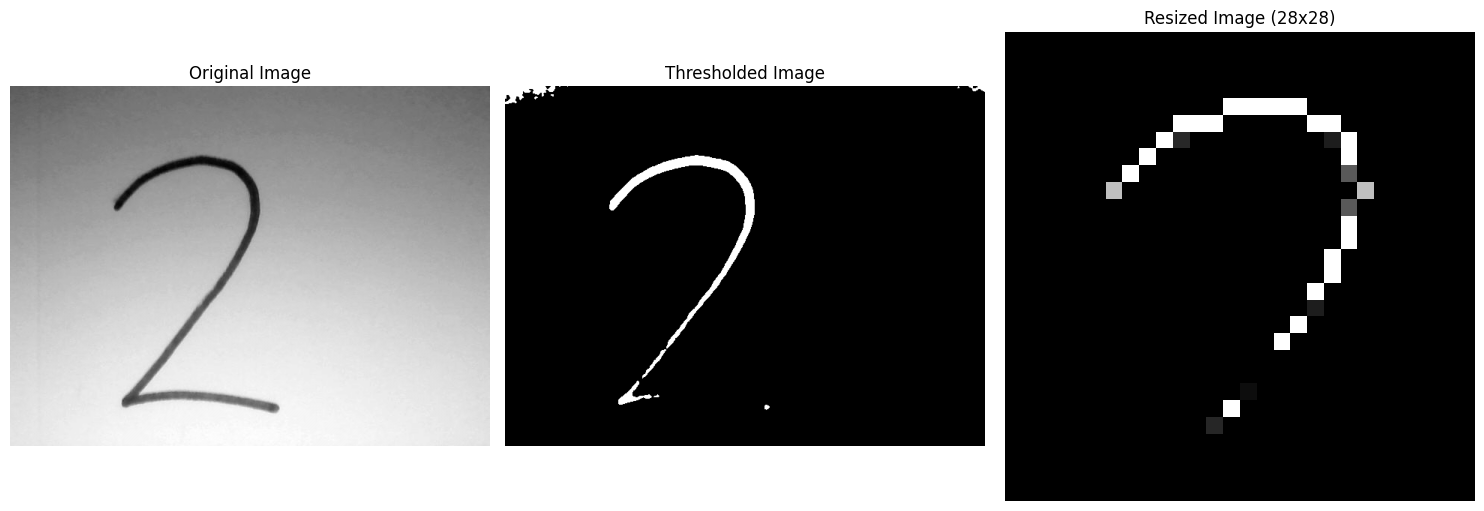

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Digit | Probability
-------------------
  0   |   0.04957
  1   |   0.00295
  2   |   0.05478
  3   |   0.37045
  4   |   0.06139
  5   |   0.03911
  6   |   0.00070
  7   |   0.02615
  8   |   0.06335
  9   |   0.33156
Predicción del modelo: 3
Etiqueta correcta: 2
Imagen 4 del dígito 2 capturada y preprocesada.


Presiona Enter para capturar imagen 5 del dígito 2...


<IPython.core.display.Javascript object>

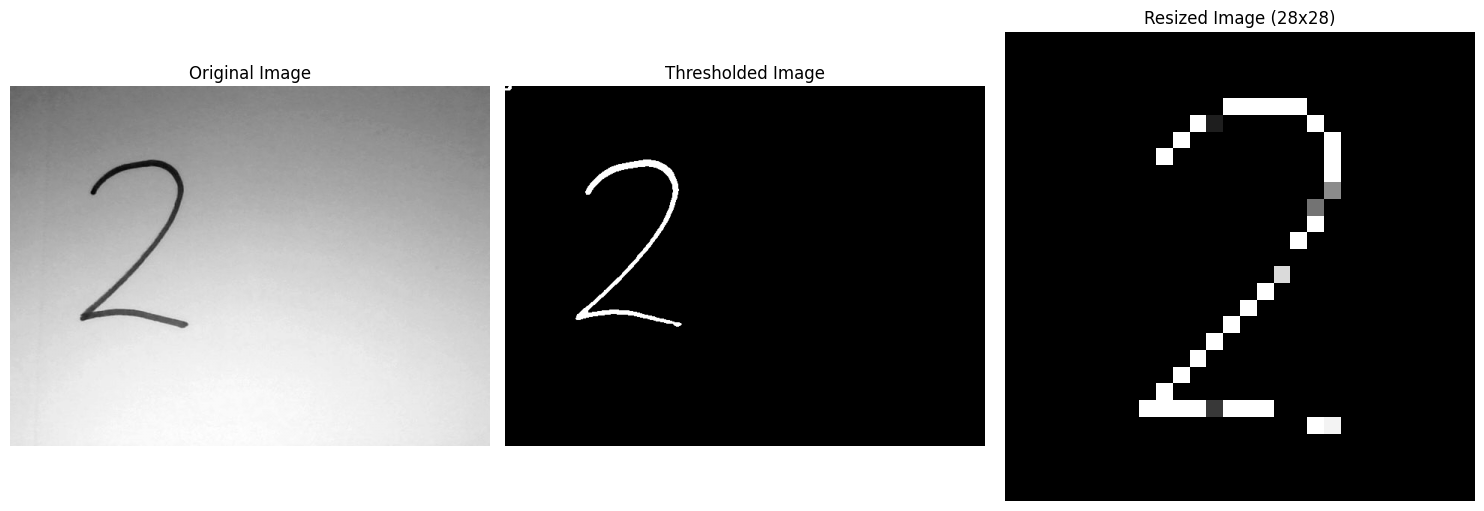

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Digit | Probability
-------------------
  0   |   0.00200
  1   |   0.00443
  2   |   0.94767
  3   |   0.01661
  4   |   0.00008
  5   |   0.00023
  6   |   0.00039
  7   |   0.00038
  8   |   0.02797
  9   |   0.00025
Predicción del modelo: 2
Etiqueta correcta: 2
Imagen 5 del dígito 2 capturada y preprocesada.


Dibuja el número 3 en una hoja y vamos a capturar 5 imágenes:

Presiona Enter para capturar imagen 1 del dígito 3...


<IPython.core.display.Javascript object>

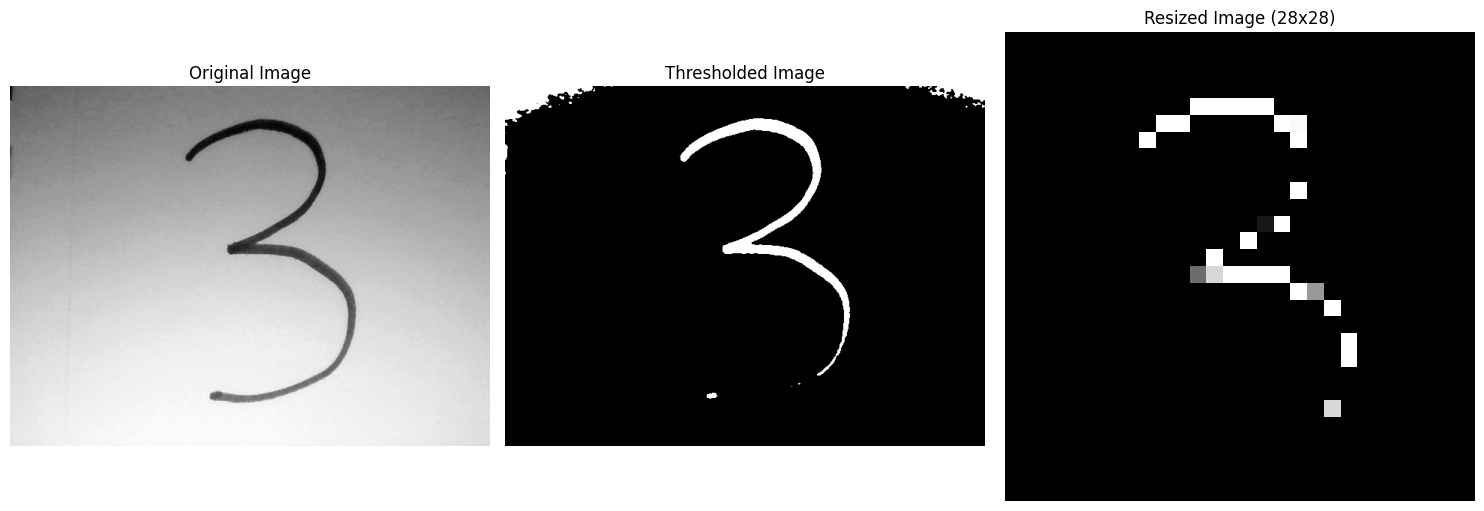

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Digit | Probability
-------------------
  0   |   0.00001
  1   |   0.00141
  2   |   0.01907
  3   |   0.93946
  4   |   0.00558
  5   |   0.02310
  6   |   0.00004
  7   |   0.00042
  8   |   0.01066
  9   |   0.00027
Predicción del modelo: 3
Etiqueta correcta: 3
Imagen 1 del dígito 3 capturada y preprocesada.


Presiona Enter para capturar imagen 2 del dígito 3...


<IPython.core.display.Javascript object>

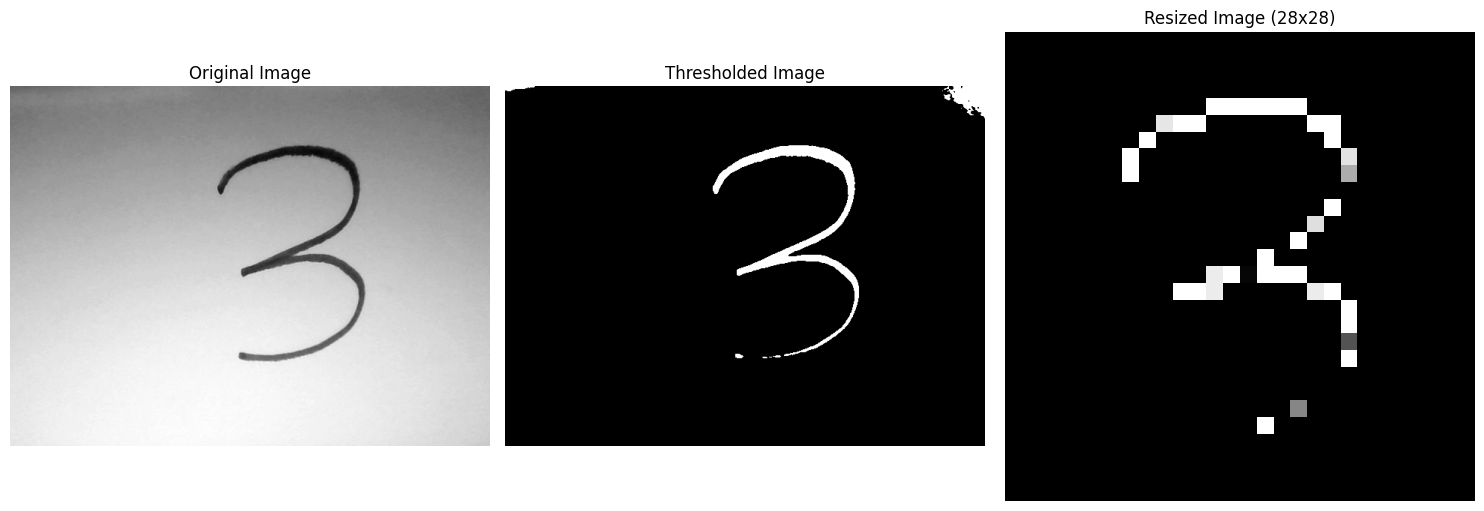

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Digit | Probability
-------------------
  0   |   0.00016
  1   |   0.00228
  2   |   0.00768
  3   |   0.46781
  4   |   0.10701
  5   |   0.10602
  6   |   0.00677
  7   |   0.00747
  8   |   0.28899
  9   |   0.00582
Predicción del modelo: 3
Etiqueta correcta: 3
Imagen 2 del dígito 3 capturada y preprocesada.


Presiona Enter para capturar imagen 3 del dígito 3...


<IPython.core.display.Javascript object>

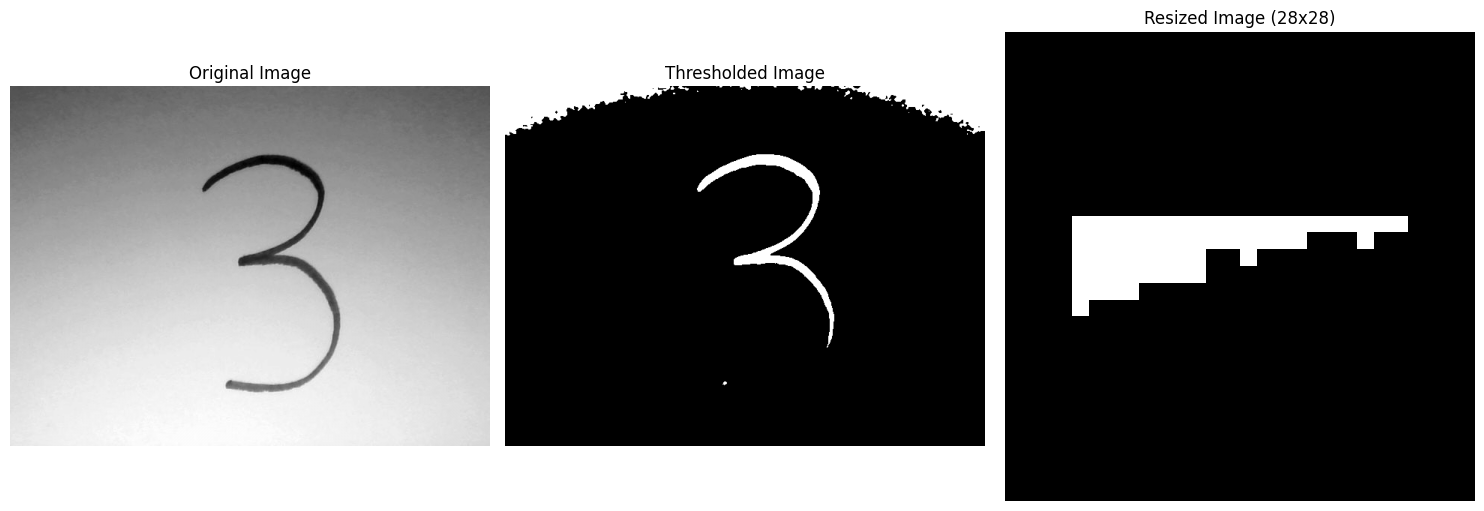

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00500
  5   |   0.06093
  6   |   0.00000
  7   |   0.93328
  8   |   0.00003
  9   |   0.00077
Predicción del modelo: 7
Etiqueta correcta: 3
Imagen 3 del dígito 3 capturada y preprocesada.


Presiona Enter para capturar imagen 4 del dígito 3...


<IPython.core.display.Javascript object>

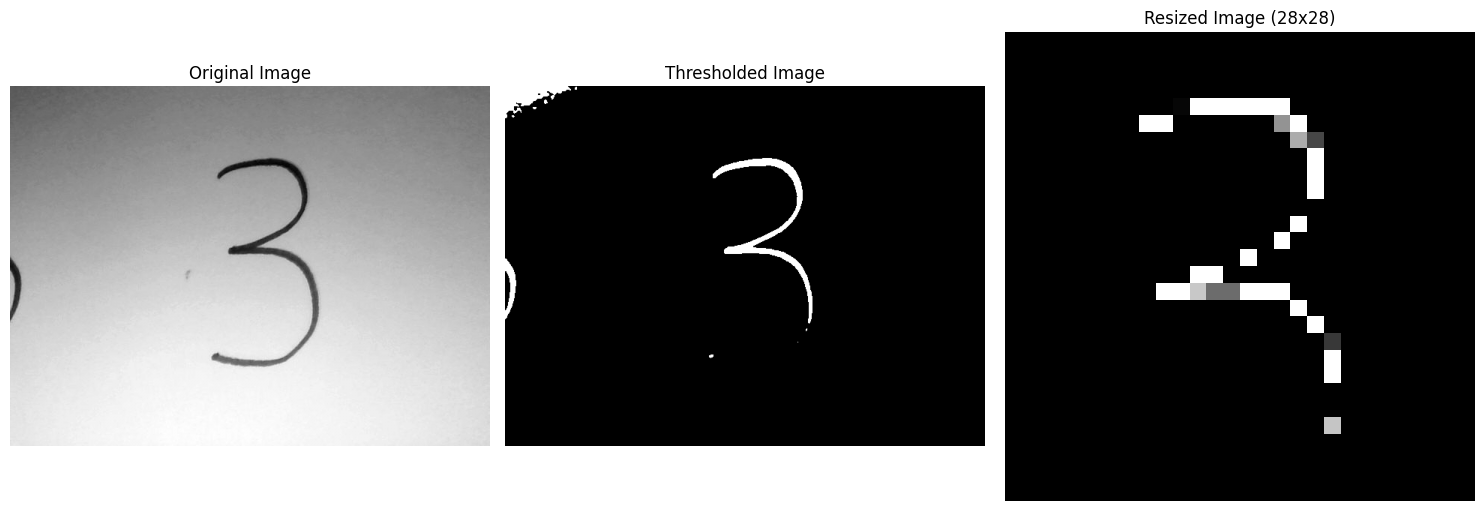

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Digit | Probability
-------------------
  0   |   0.00010
  1   |   0.02627
  2   |   0.10282
  3   |   0.76316
  4   |   0.02521
  5   |   0.00932
  6   |   0.00040
  7   |   0.00125
  8   |   0.07038
  9   |   0.00110
Predicción del modelo: 3
Etiqueta correcta: 3
Imagen 4 del dígito 3 capturada y preprocesada.


Presiona Enter para capturar imagen 5 del dígito 3...


<IPython.core.display.Javascript object>

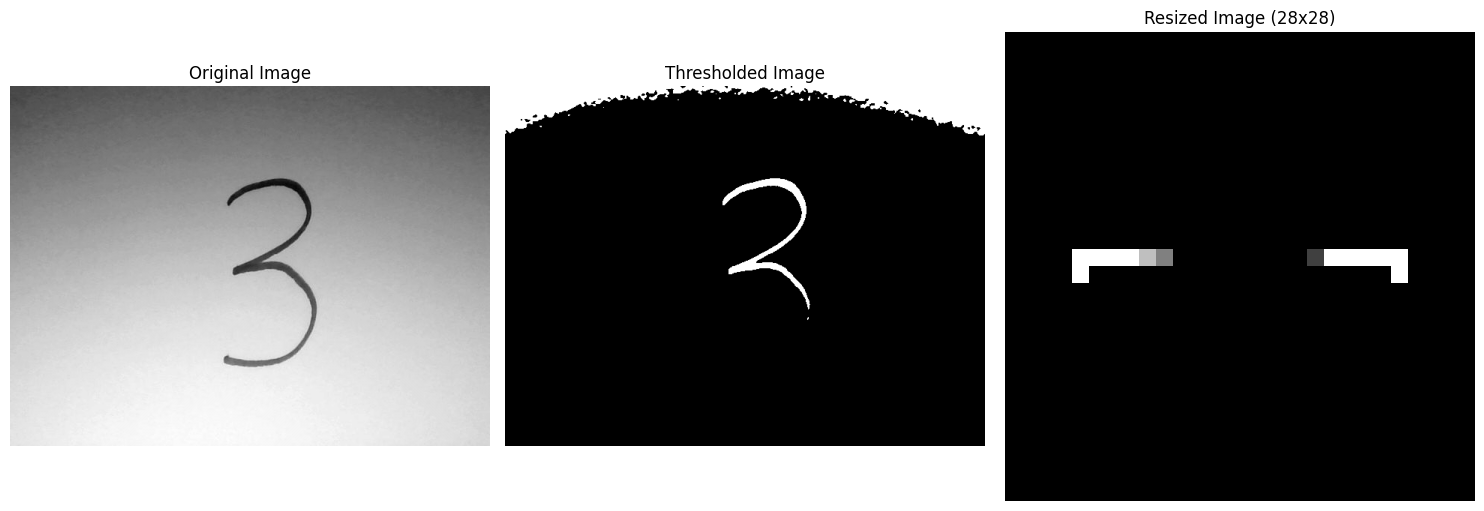

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Digit | Probability
-------------------
  0   |   0.00708
  1   |   0.00314
  2   |   0.00284
  3   |   0.00408
  4   |   0.72141
  5   |   0.02686
  6   |   0.02892
  7   |   0.12795
  8   |   0.01415
  9   |   0.06358
Predicción del modelo: 4
Etiqueta correcta: 3
Imagen 5 del dígito 3 capturada y preprocesada.


Dibuja el número 4 en una hoja y vamos a capturar 5 imágenes:

Presiona Enter para capturar imagen 1 del dígito 4...


<IPython.core.display.Javascript object>

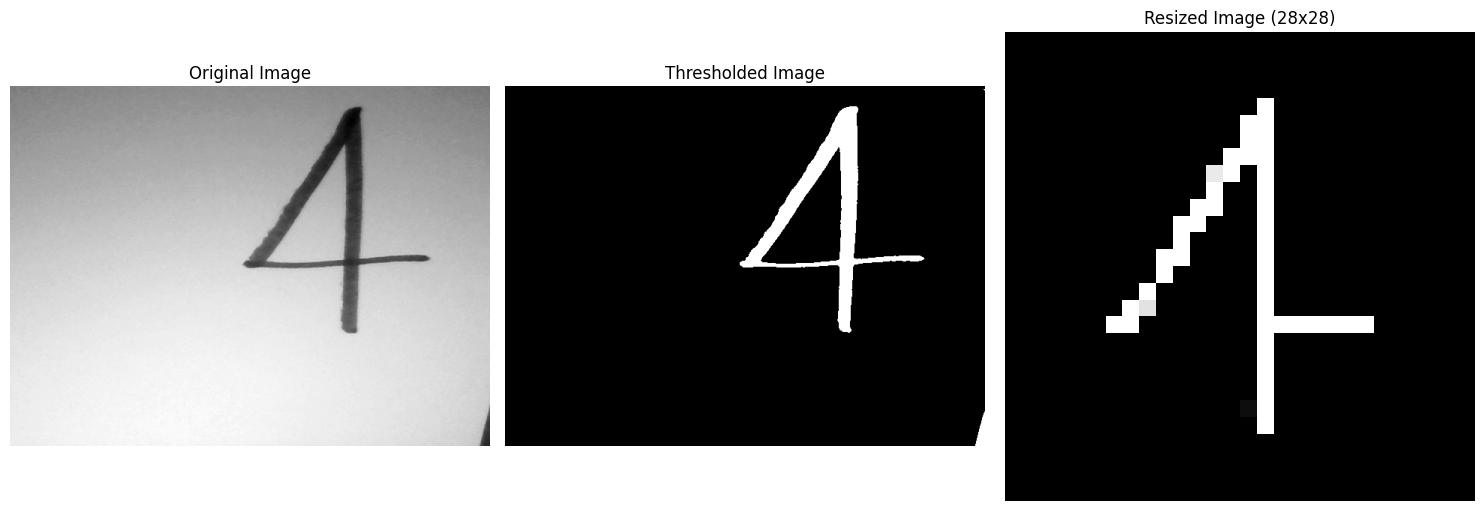

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Digit | Probability
-------------------
  0   |   0.00025
  1   |   0.31360
  2   |   0.05628
  3   |   0.02024
  4   |   0.39265
  5   |   0.00554
  6   |   0.00083
  7   |   0.20732
  8   |   0.00054
  9   |   0.00276
Predicción del modelo: 4
Etiqueta correcta: 4
Imagen 1 del dígito 4 capturada y preprocesada.


Presiona Enter para capturar imagen 2 del dígito 4...


<IPython.core.display.Javascript object>

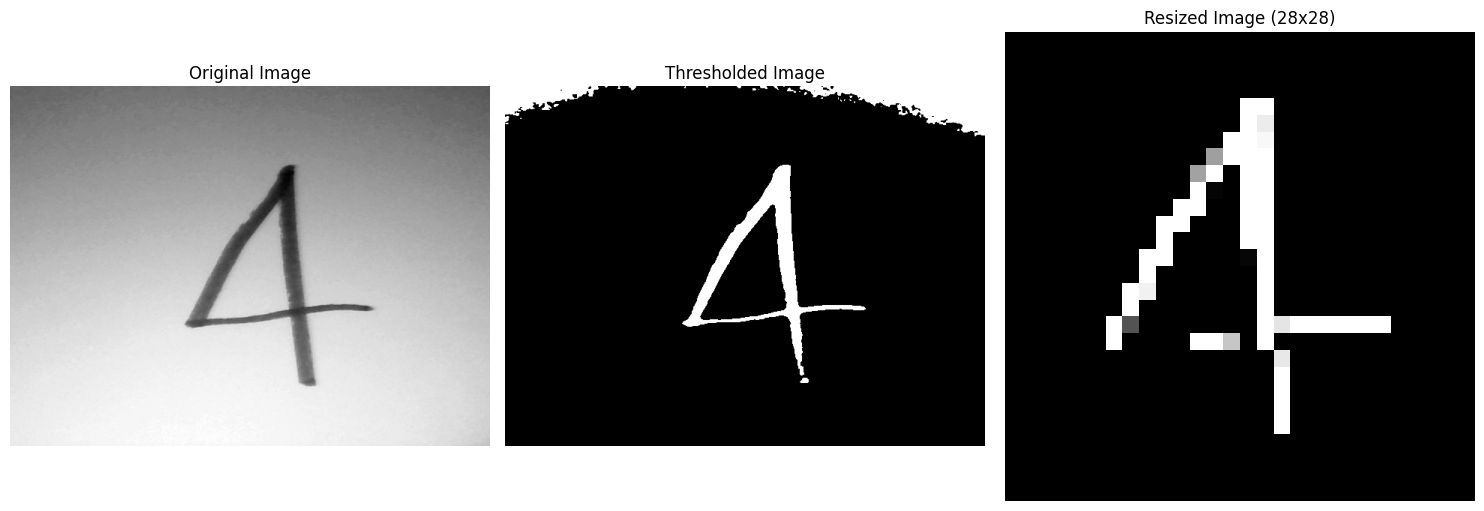

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Digit | Probability
-------------------
  0   |   0.00030
  1   |   0.39299
  2   |   0.02588
  3   |   0.29432
  4   |   0.08869
  5   |   0.00674
  6   |   0.00017
  7   |   0.13159
  8   |   0.02421
  9   |   0.03511
Predicción del modelo: 1
Etiqueta correcta: 4
Imagen 2 del dígito 4 capturada y preprocesada.


Presiona Enter para capturar imagen 3 del dígito 4...


<IPython.core.display.Javascript object>

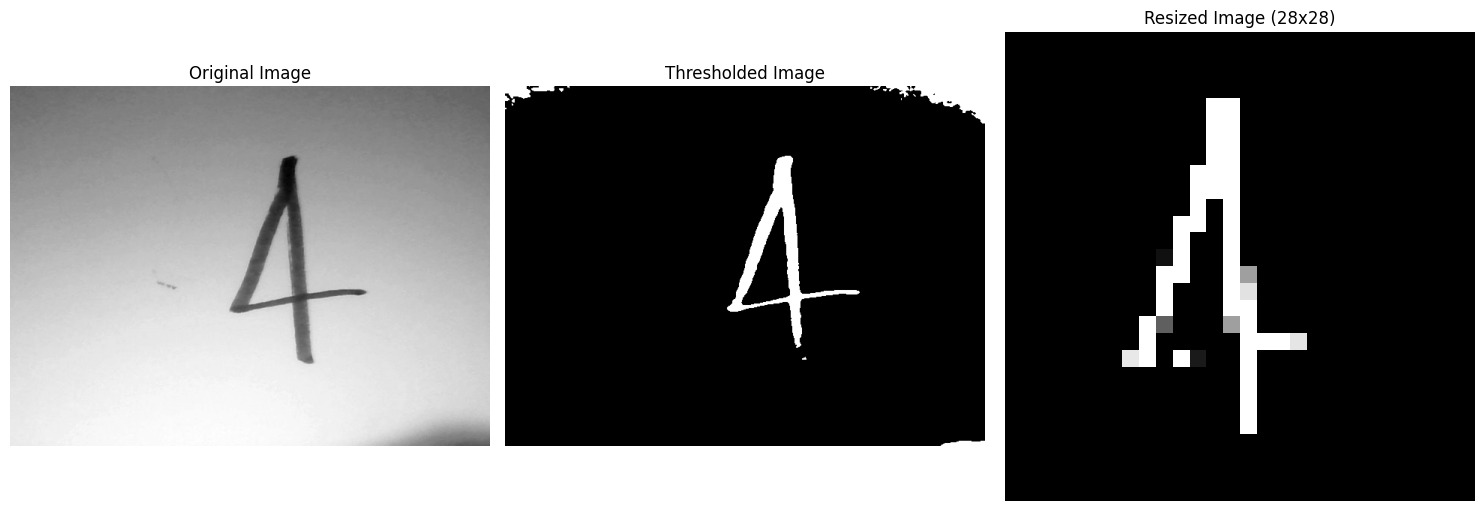

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Digit | Probability
-------------------
  0   |   0.00019
  1   |   0.22779
  2   |   0.00338
  3   |   0.00637
  4   |   0.66804
  5   |   0.01600
  6   |   0.06367
  7   |   0.00981
  8   |   0.00402
  9   |   0.00072
Predicción del modelo: 4
Etiqueta correcta: 4
Imagen 3 del dígito 4 capturada y preprocesada.


Presiona Enter para capturar imagen 4 del dígito 4...


<IPython.core.display.Javascript object>

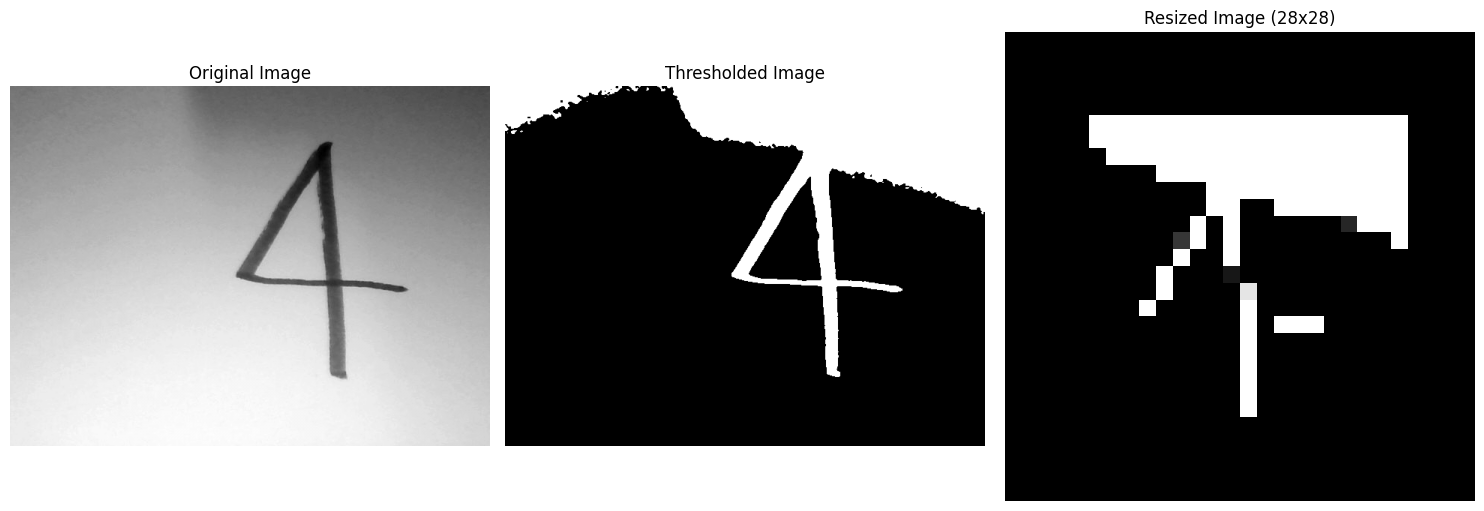

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Digit | Probability
-------------------
  0   |   0.00162
  1   |   0.00000
  2   |   0.00137
  3   |   0.00535
  4   |   0.00000
  5   |   0.00009
  6   |   0.00000
  7   |   0.98034
  8   |   0.01122
  9   |   0.00001
Predicción del modelo: 7
Etiqueta correcta: 4
Imagen 4 del dígito 4 capturada y preprocesada.


Presiona Enter para capturar imagen 5 del dígito 4...


<IPython.core.display.Javascript object>

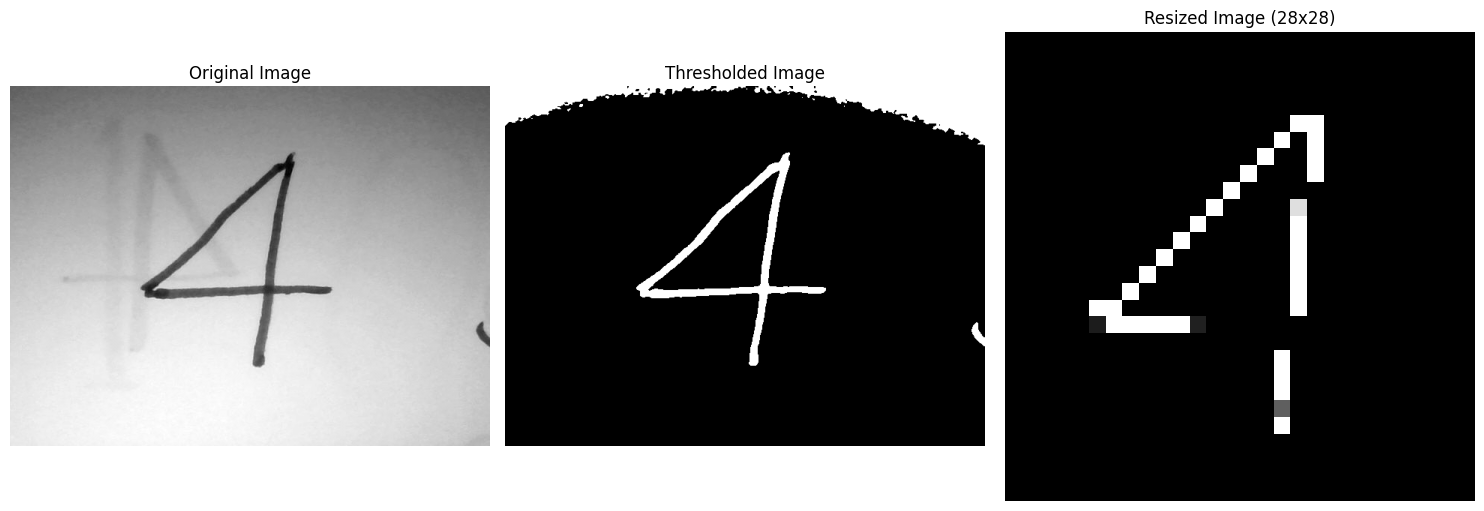

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Digit | Probability
-------------------
  0   |   0.00280
  1   |   0.01391
  2   |   0.08002
  3   |   0.00029
  4   |   0.84702
  5   |   0.00427
  6   |   0.00108
  7   |   0.01907
  8   |   0.00258
  9   |   0.02896
Predicción del modelo: 4
Etiqueta correcta: 4
Imagen 5 del dígito 4 capturada y preprocesada.


Dibuja el número 5 en una hoja y vamos a capturar 5 imágenes:

Presiona Enter para capturar imagen 1 del dígito 5...


<IPython.core.display.Javascript object>

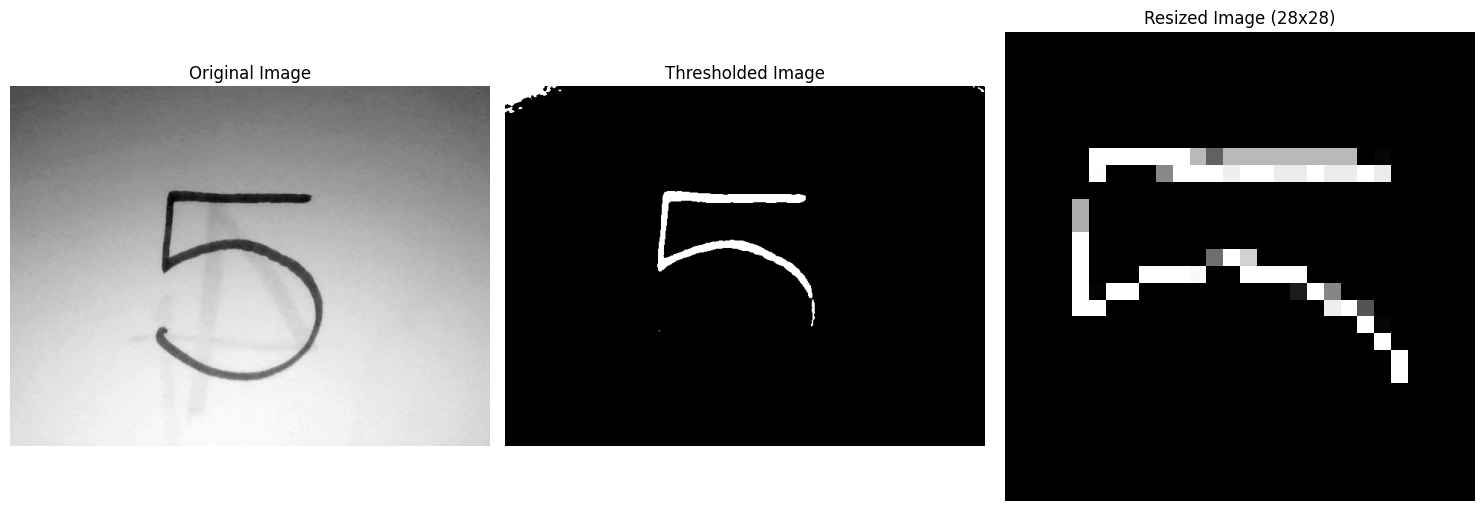

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Digit | Probability
-------------------
  0   |   0.00002
  1   |   0.00000
  2   |   0.00260
  3   |   0.02591
  4   |   0.00006
  5   |   0.04249
  6   |   0.00000
  7   |   0.92316
  8   |   0.00025
  9   |   0.00551
Predicción del modelo: 7
Etiqueta correcta: 5
Imagen 1 del dígito 5 capturada y preprocesada.


Presiona Enter para capturar imagen 2 del dígito 5...


<IPython.core.display.Javascript object>

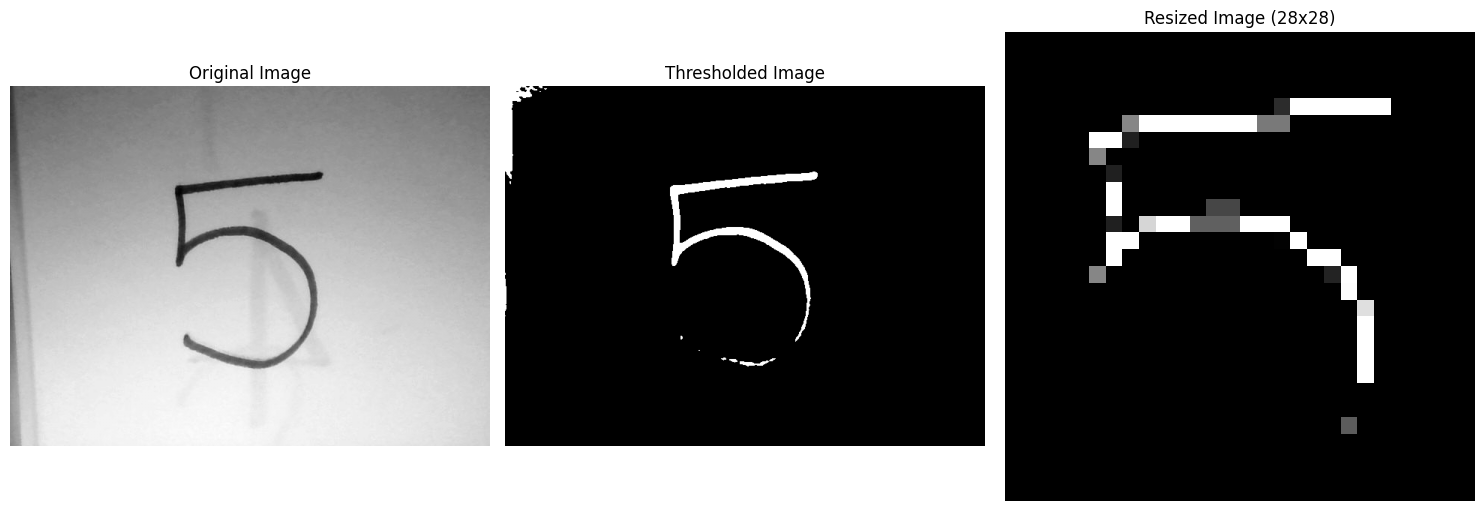

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Digit | Probability
-------------------
  0   |   0.00397
  1   |   0.00218
  2   |   0.00216
  3   |   0.23983
  4   |   0.04924
  5   |   0.15420
  6   |   0.02592
  7   |   0.40224
  8   |   0.06512
  9   |   0.05514
Predicción del modelo: 7
Etiqueta correcta: 5
Imagen 2 del dígito 5 capturada y preprocesada.


Presiona Enter para capturar imagen 3 del dígito 5...


<IPython.core.display.Javascript object>

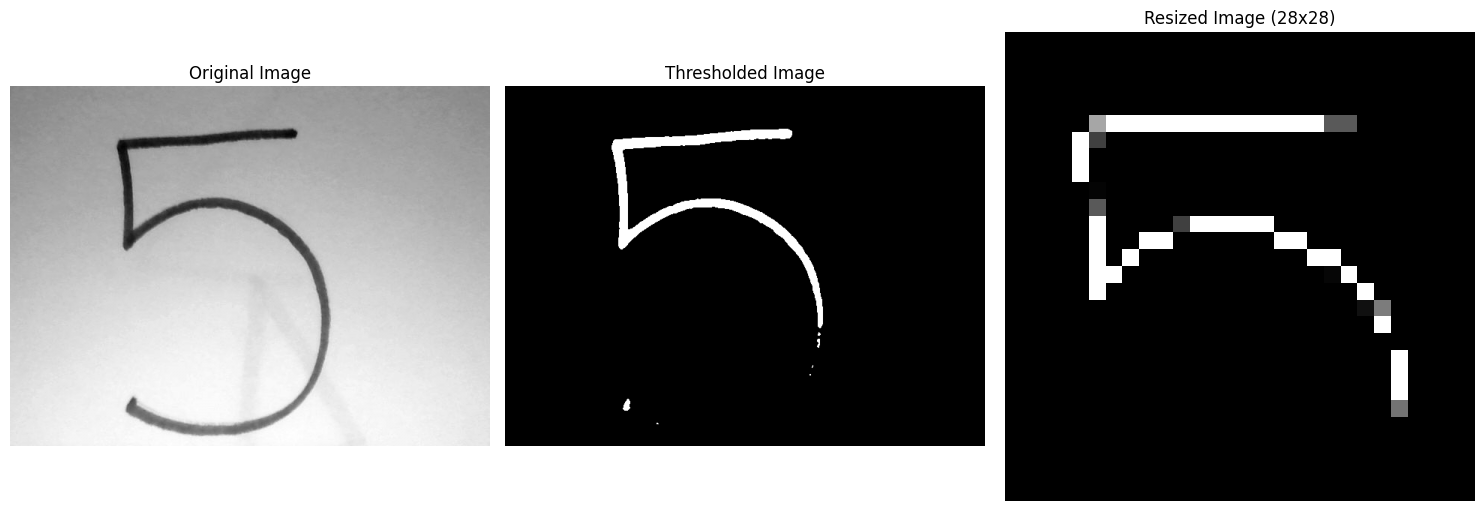

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Digit | Probability
-------------------
  0   |   0.00018
  1   |   0.01106
  2   |   0.00827
  3   |   0.84890
  4   |   0.00167
  5   |   0.01965
  6   |   0.00078
  7   |   0.03511
  8   |   0.06320
  9   |   0.01117
Predicción del modelo: 3
Etiqueta correcta: 5
Imagen 3 del dígito 5 capturada y preprocesada.


Presiona Enter para capturar imagen 4 del dígito 5...


<IPython.core.display.Javascript object>

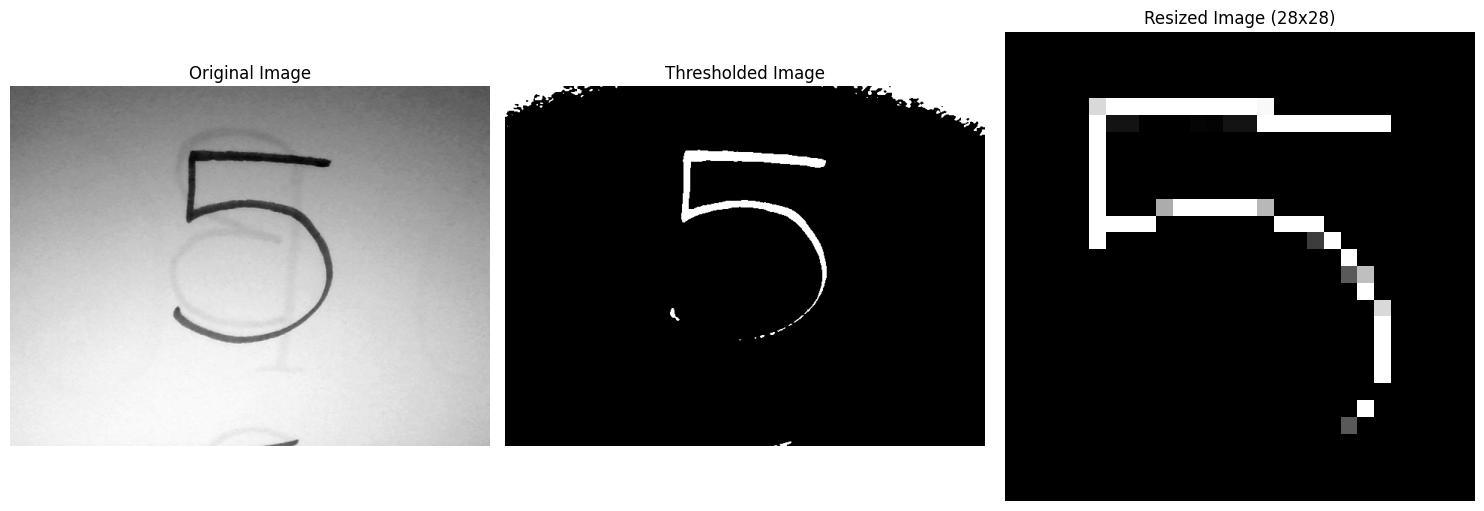

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Digit | Probability
-------------------
  0   |   0.00007
  1   |   0.00711
  2   |   0.04985
  3   |   0.85265
  4   |   0.00022
  5   |   0.06112
  6   |   0.00036
  7   |   0.00130
  8   |   0.02679
  9   |   0.00052
Predicción del modelo: 3
Etiqueta correcta: 5
Imagen 4 del dígito 5 capturada y preprocesada.


Presiona Enter para capturar imagen 5 del dígito 5...


<IPython.core.display.Javascript object>

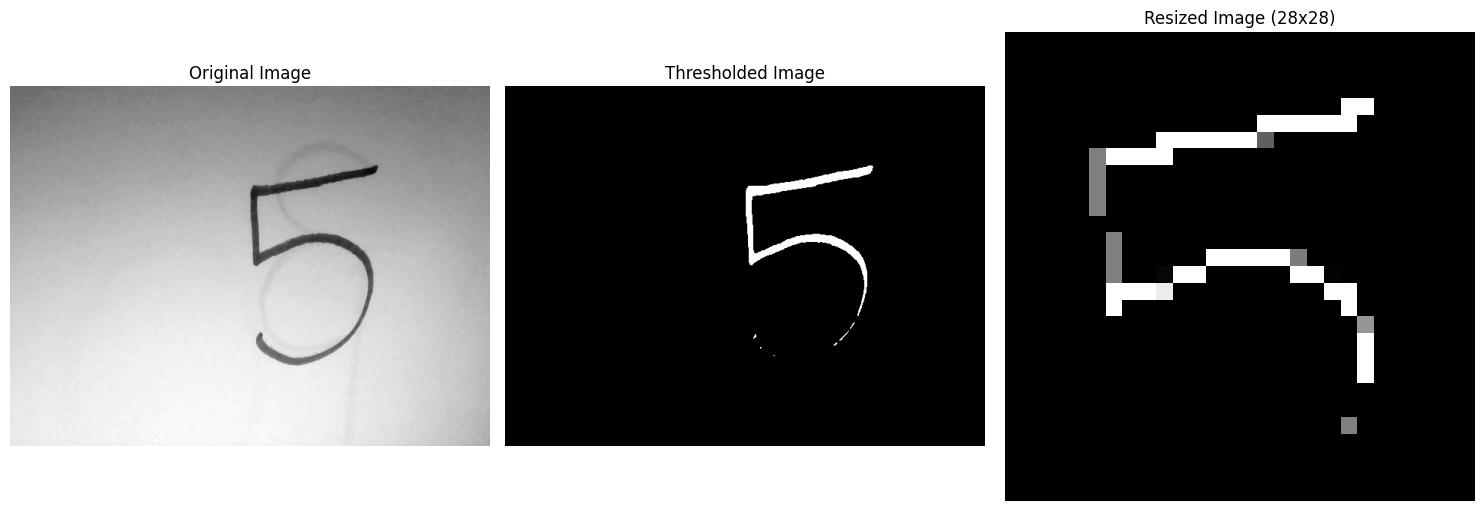

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Digit | Probability
-------------------
  0   |   0.00021
  1   |   0.00008
  2   |   0.06667
  3   |   0.52385
  4   |   0.00516
  5   |   0.21334
  6   |   0.01419
  7   |   0.03214
  8   |   0.14377
  9   |   0.00060
Predicción del modelo: 3
Etiqueta correcta: 5
Imagen 5 del dígito 5 capturada y preprocesada.


Dibuja el número 6 en una hoja y vamos a capturar 5 imágenes:

Presiona Enter para capturar imagen 1 del dígito 6...


<IPython.core.display.Javascript object>

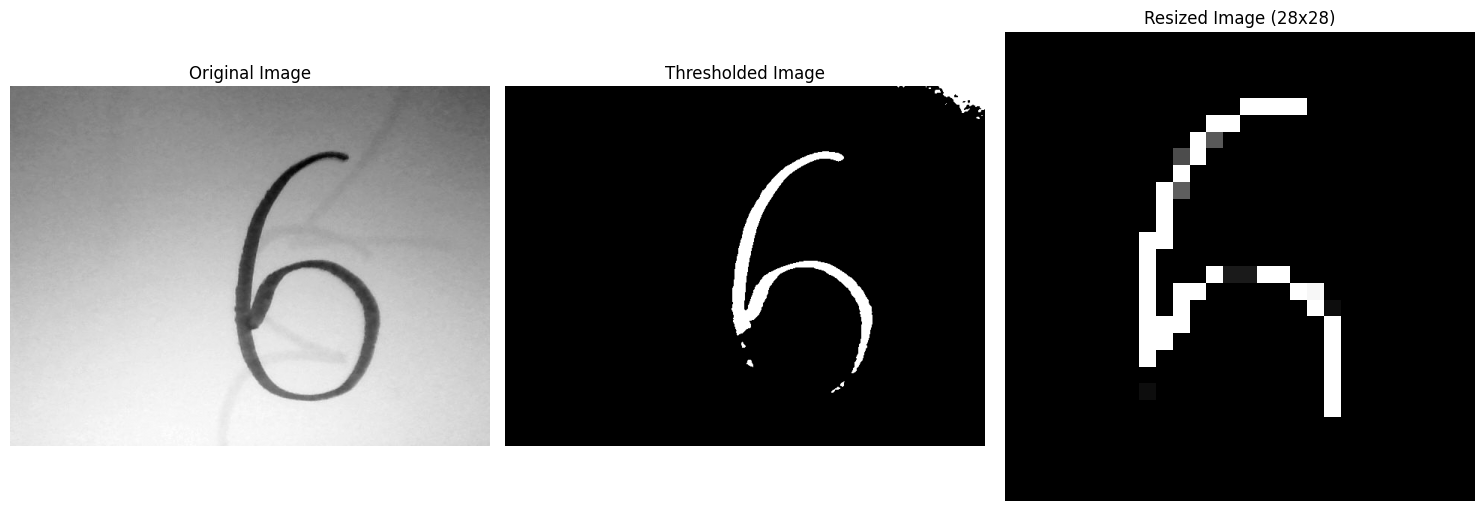

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Digit | Probability
-------------------
  0   |   0.01136
  1   |   0.00004
  2   |   0.00753
  3   |   0.00005
  4   |   0.69763
  5   |   0.03979
  6   |   0.15734
  7   |   0.00903
  8   |   0.06761
  9   |   0.00962
Predicción del modelo: 4
Etiqueta correcta: 6
Imagen 1 del dígito 6 capturada y preprocesada.


Presiona Enter para capturar imagen 2 del dígito 6...


<IPython.core.display.Javascript object>

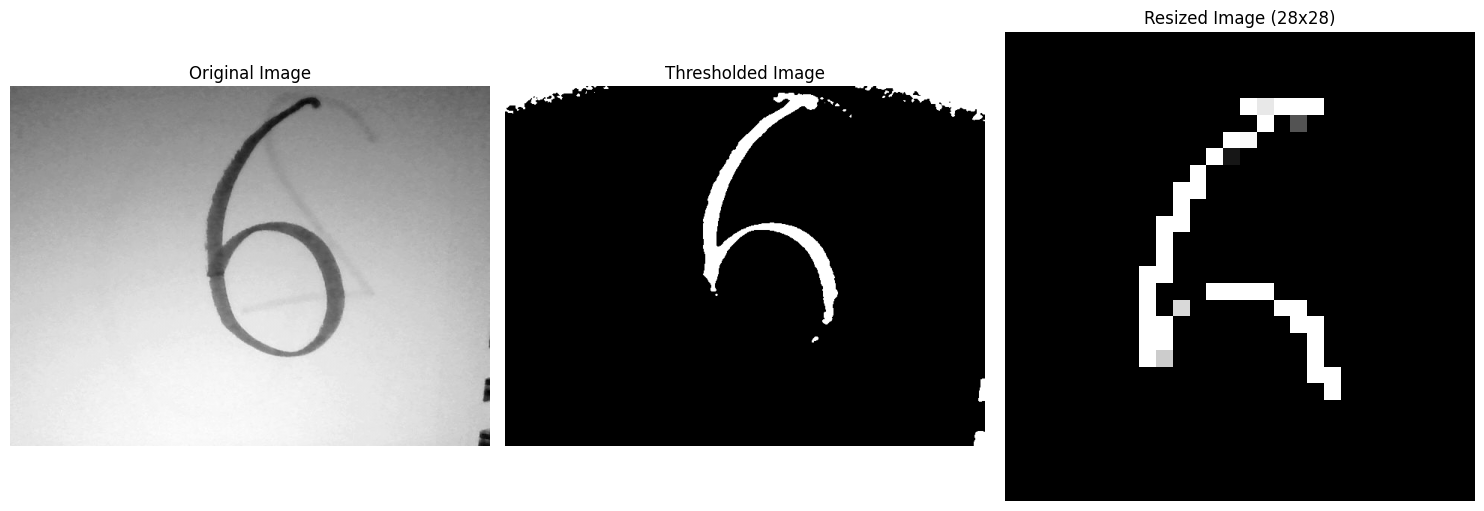

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Digit | Probability
-------------------
  0   |   0.01211
  1   |   0.00071
  2   |   0.07057
  3   |   0.00096
  4   |   0.40190
  5   |   0.05404
  6   |   0.41532
  7   |   0.01272
  8   |   0.01407
  9   |   0.01761
Predicción del modelo: 6
Etiqueta correcta: 6
Imagen 2 del dígito 6 capturada y preprocesada.


Presiona Enter para capturar imagen 3 del dígito 6...


<IPython.core.display.Javascript object>

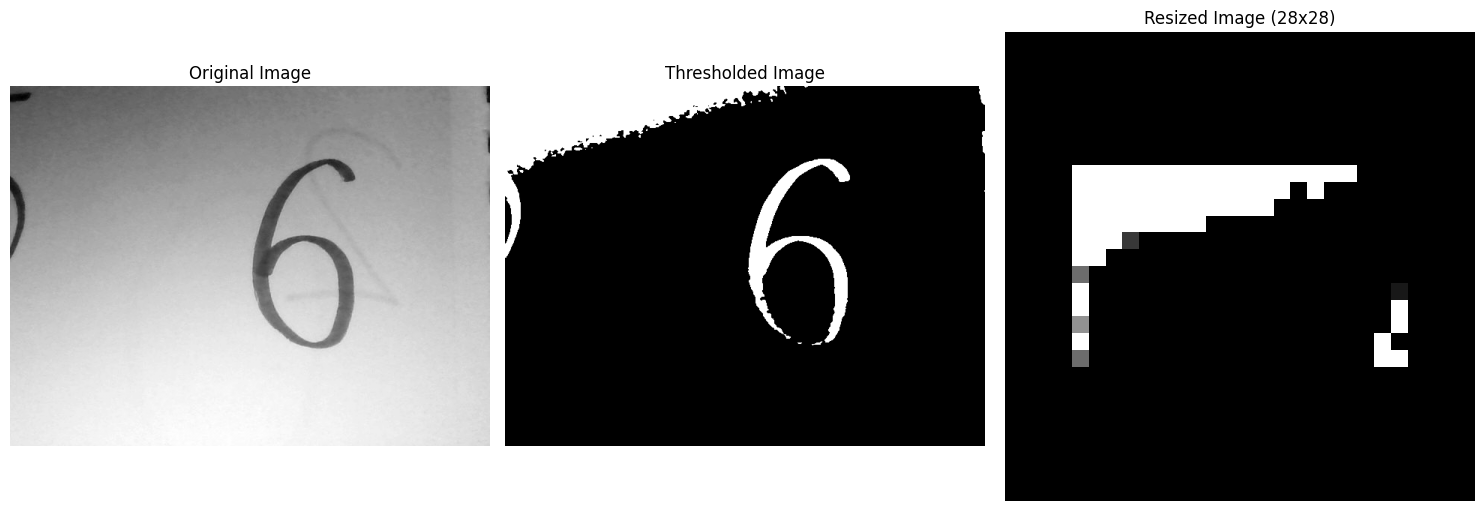

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00003
  3   |   0.00002
  4   |   0.00000
  5   |   0.00001
  6   |   0.00000
  7   |   0.99994
  8   |   0.00000
  9   |   0.00000
Predicción del modelo: 7
Etiqueta correcta: 6
Imagen 3 del dígito 6 capturada y preprocesada.


Presiona Enter para capturar imagen 4 del dígito 6...


<IPython.core.display.Javascript object>

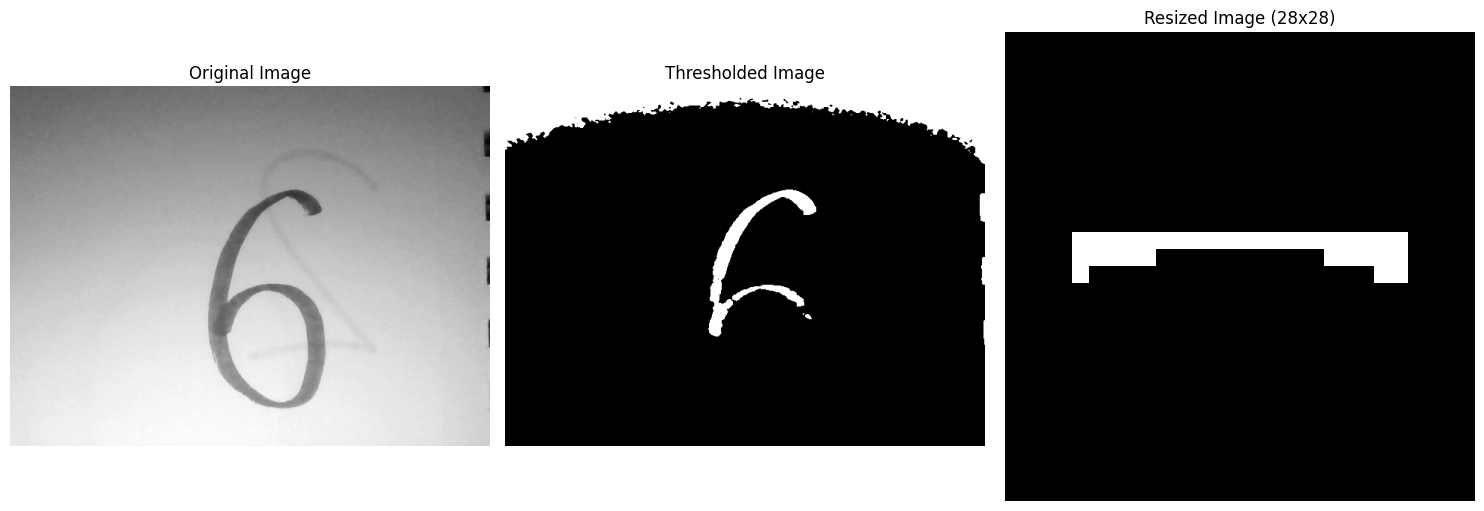

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Digit | Probability
-------------------
  0   |   0.00006
  1   |   0.00031
  2   |   0.00006
  3   |   0.00038
  4   |   0.10683
  5   |   0.03323
  6   |   0.00282
  7   |   0.71947
  8   |   0.03135
  9   |   0.10548
Predicción del modelo: 7
Etiqueta correcta: 6
Imagen 4 del dígito 6 capturada y preprocesada.


Presiona Enter para capturar imagen 5 del dígito 6...


<IPython.core.display.Javascript object>

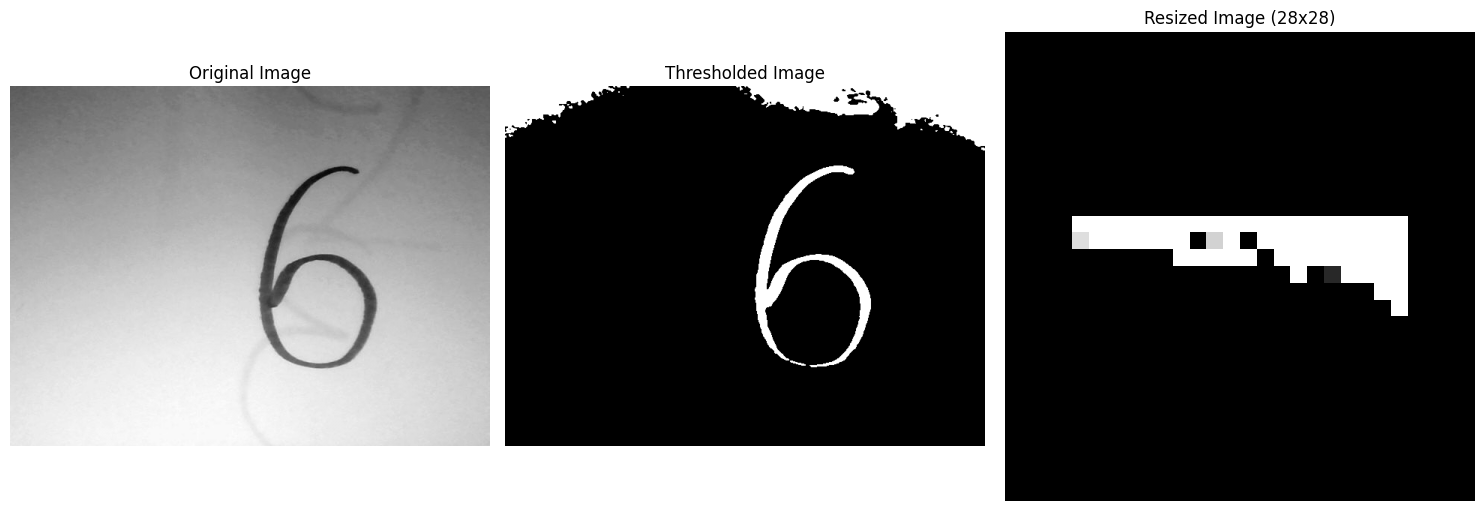

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00045
  5   |   0.00158
  6   |   0.00000
  7   |   0.99693
  8   |   0.00020
  9   |   0.00084
Predicción del modelo: 7
Etiqueta correcta: 6
Imagen 5 del dígito 6 capturada y preprocesada.


Dibuja el número 7 en una hoja y vamos a capturar 5 imágenes:

Presiona Enter para capturar imagen 1 del dígito 7...


<IPython.core.display.Javascript object>

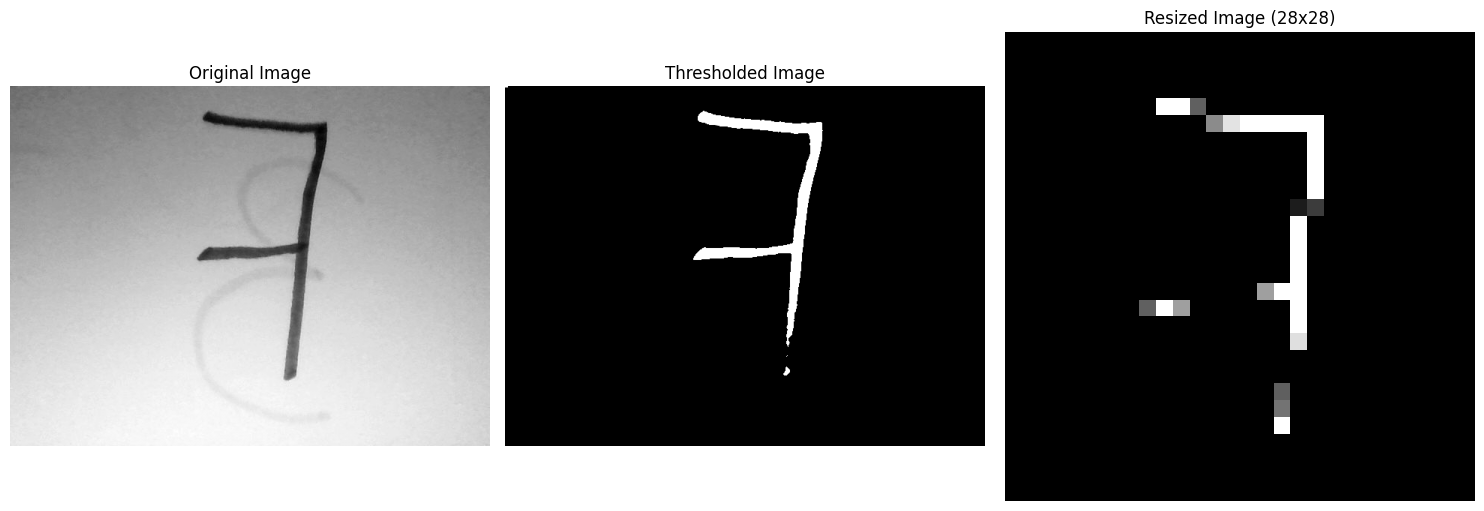

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Digit | Probability
-------------------
  0   |   0.06306
  1   |   0.06231
  2   |   0.65587
  3   |   0.04514
  4   |   0.02389
  5   |   0.00014
  6   |   0.00065
  7   |   0.05948
  8   |   0.03036
  9   |   0.05910
Predicción del modelo: 2
Etiqueta correcta: 7
Imagen 1 del dígito 7 capturada y preprocesada.


Presiona Enter para capturar imagen 2 del dígito 7...


<IPython.core.display.Javascript object>

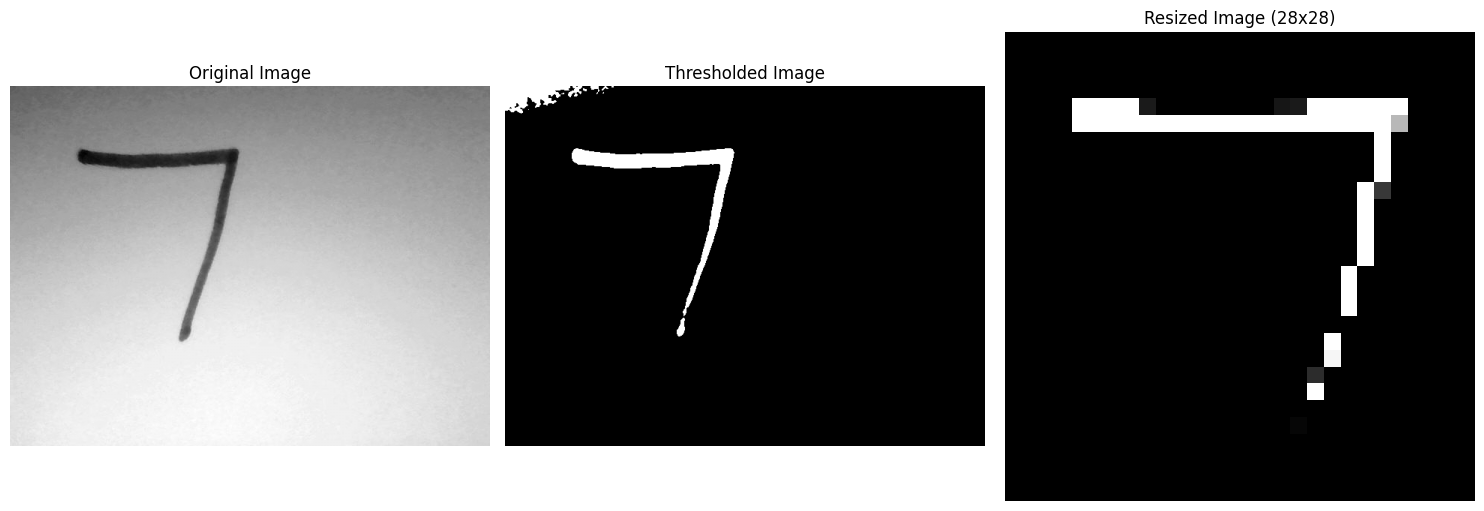

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Digit | Probability
-------------------
  0   |   0.01042
  1   |   0.01870
  2   |   0.01852
  3   |   0.68462
  4   |   0.00916
  5   |   0.15323
  6   |   0.02931
  7   |   0.03932
  8   |   0.03132
  9   |   0.00540
Predicción del modelo: 3
Etiqueta correcta: 7
Imagen 2 del dígito 7 capturada y preprocesada.


Presiona Enter para capturar imagen 3 del dígito 7...


<IPython.core.display.Javascript object>

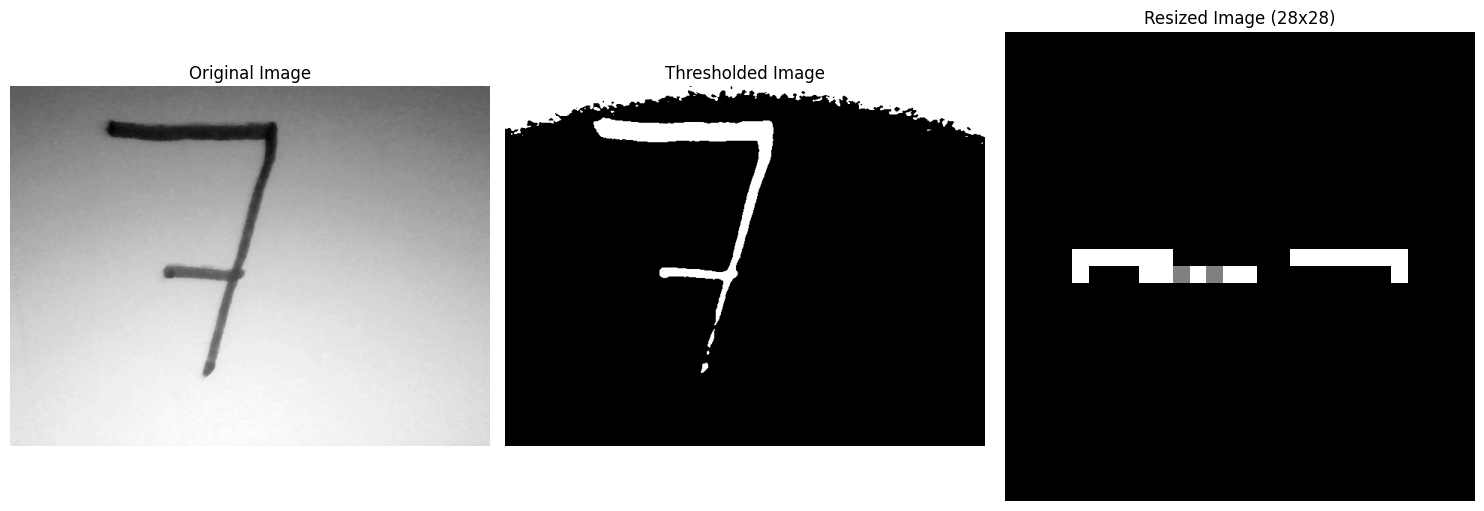

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Digit | Probability
-------------------
  0   |   0.00001
  1   |   0.00002
  2   |   0.00010
  3   |   0.00069
  4   |   0.98033
  5   |   0.00461
  6   |   0.00055
  7   |   0.00784
  8   |   0.00073
  9   |   0.00512
Predicción del modelo: 4
Etiqueta correcta: 7
Imagen 3 del dígito 7 capturada y preprocesada.


Presiona Enter para capturar imagen 4 del dígito 7...


<IPython.core.display.Javascript object>

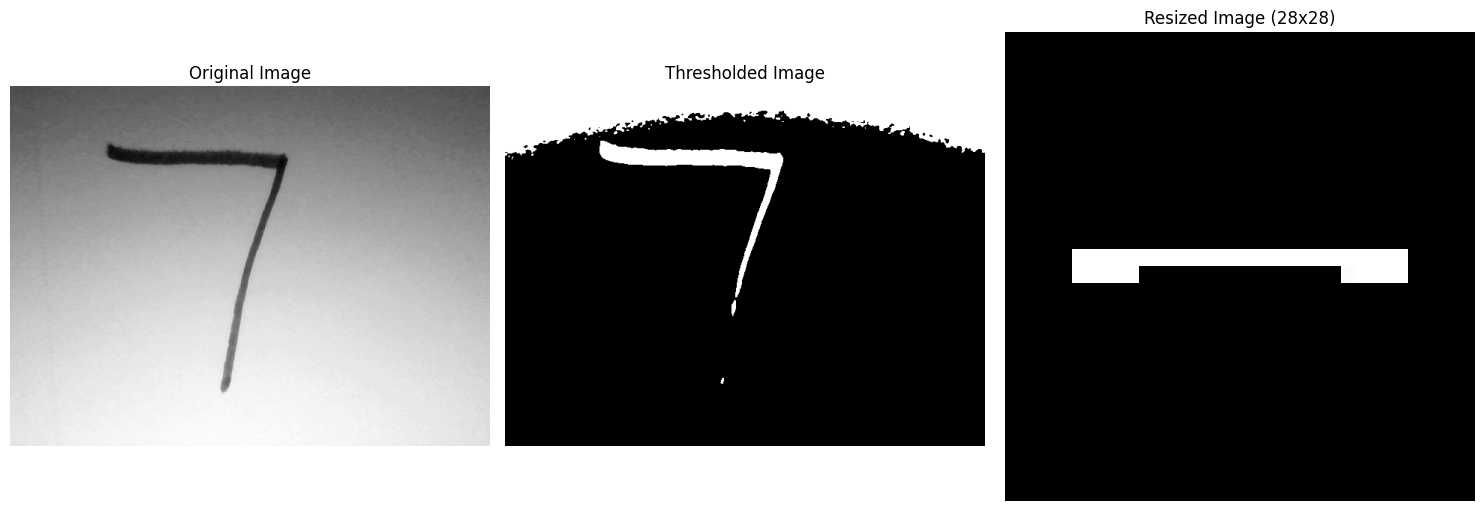

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Digit | Probability
-------------------
  0   |   0.00001
  1   |   0.00002
  2   |   0.00017
  3   |   0.00042
  4   |   0.95492
  5   |   0.00457
  6   |   0.00106
  7   |   0.03434
  8   |   0.00041
  9   |   0.00408
Predicción del modelo: 4
Etiqueta correcta: 7
Imagen 4 del dígito 7 capturada y preprocesada.


Presiona Enter para capturar imagen 5 del dígito 7...


<IPython.core.display.Javascript object>

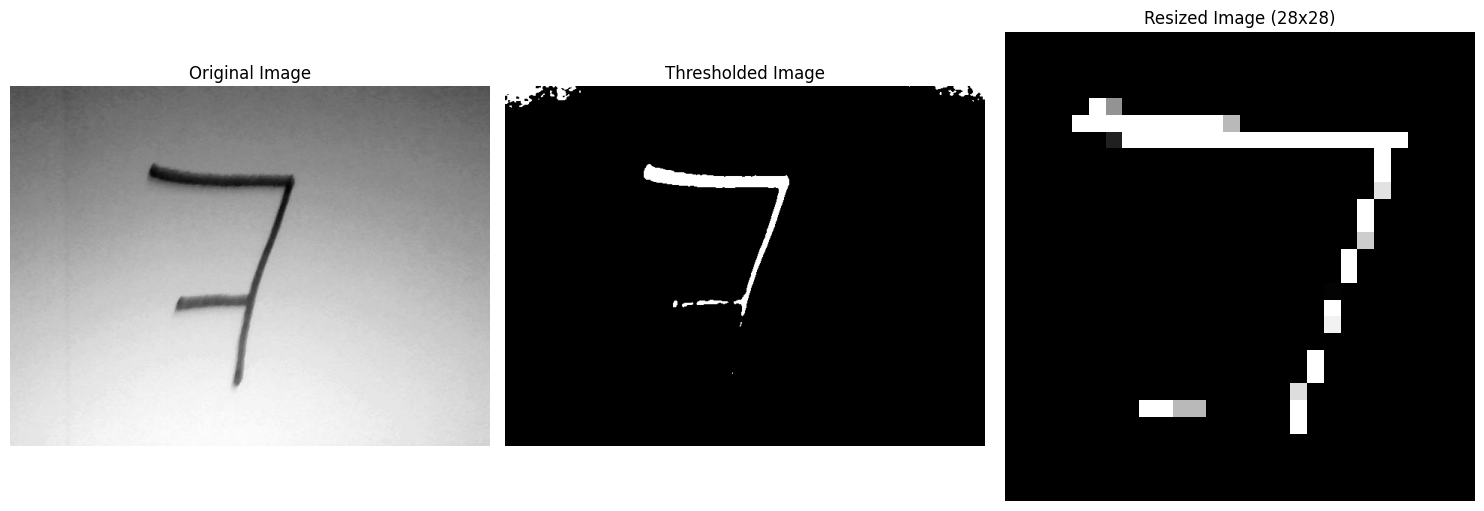

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Digit | Probability
-------------------
  0   |   0.01232
  1   |   0.00273
  2   |   0.10866
  3   |   0.56946
  4   |   0.00000
  5   |   0.24829
  6   |   0.00002
  7   |   0.04072
  8   |   0.00269
  9   |   0.01509
Predicción del modelo: 3
Etiqueta correcta: 7
Imagen 5 del dígito 7 capturada y preprocesada.


Dibuja el número 8 en una hoja y vamos a capturar 5 imágenes:

Presiona Enter para capturar imagen 1 del dígito 8...


<IPython.core.display.Javascript object>

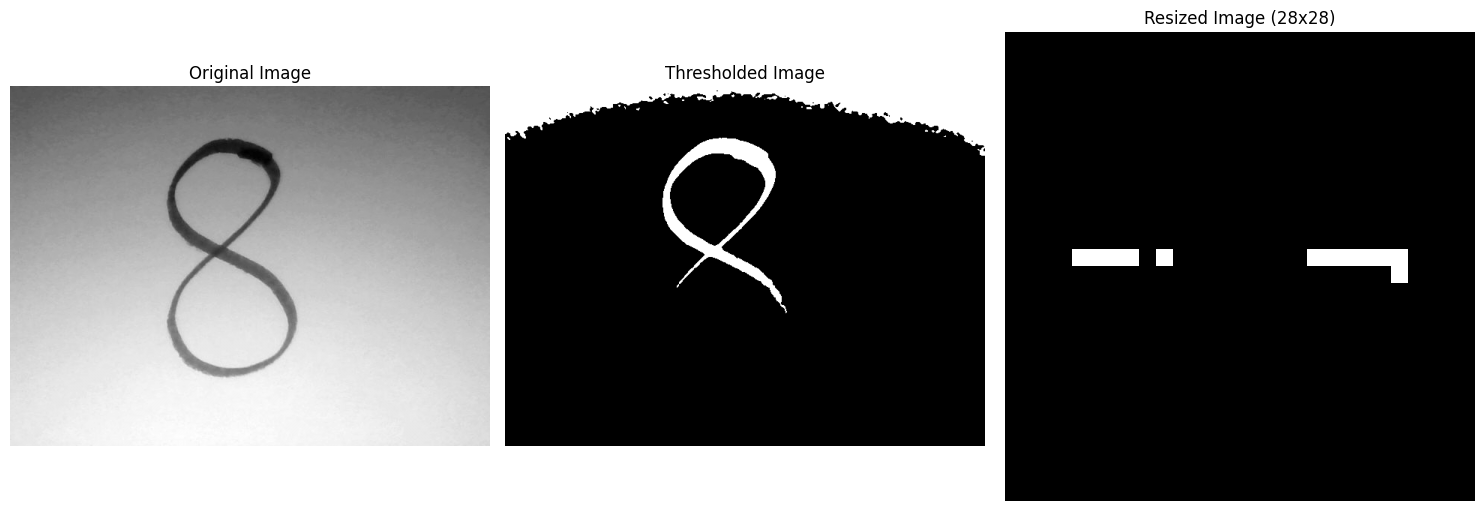

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Digit | Probability
-------------------
  0   |   0.00723
  1   |   0.00746
  2   |   0.00731
  3   |   0.01359
  4   |   0.68449
  5   |   0.03264
  6   |   0.03215
  7   |   0.12909
  8   |   0.03676
  9   |   0.04928
Predicción del modelo: 4
Etiqueta correcta: 8
Imagen 1 del dígito 8 capturada y preprocesada.


Presiona Enter para capturar imagen 2 del dígito 8...


<IPython.core.display.Javascript object>

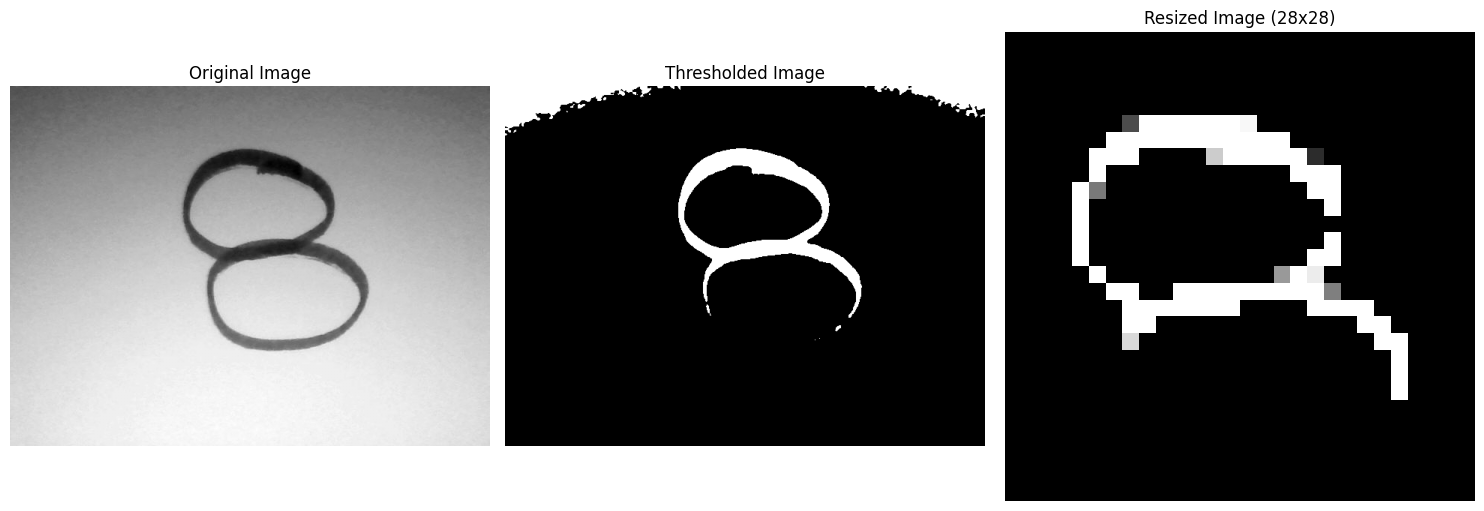

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Digit | Probability
-------------------
  0   |   0.00006
  1   |   0.00000
  2   |   0.25959
  3   |   0.07101
  4   |   0.00021
  5   |   0.00005
  6   |   0.00000
  7   |   0.66751
  8   |   0.00066
  9   |   0.00091
Predicción del modelo: 7
Etiqueta correcta: 8
Imagen 2 del dígito 8 capturada y preprocesada.


Presiona Enter para capturar imagen 3 del dígito 8...


<IPython.core.display.Javascript object>

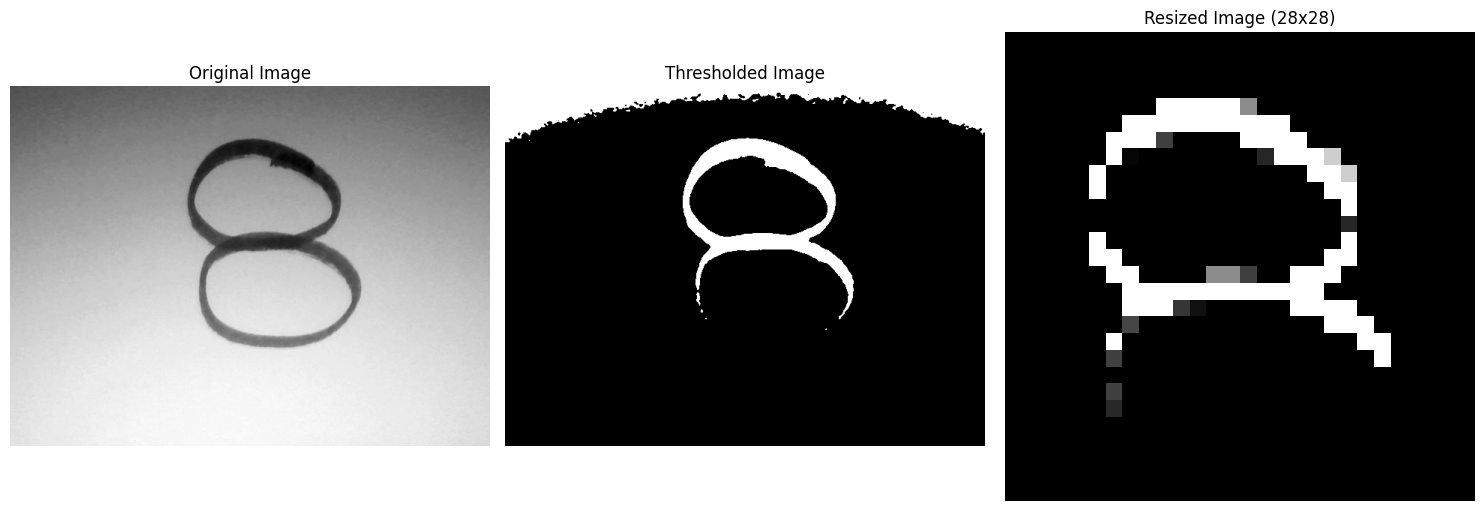

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Digit | Probability
-------------------
  0   |   0.01345
  1   |   0.00003
  2   |   0.69950
  3   |   0.00151
  4   |   0.10484
  5   |   0.00000
  6   |   0.00024
  7   |   0.16741
  8   |   0.01212
  9   |   0.00091
Predicción del modelo: 2
Etiqueta correcta: 8
Imagen 3 del dígito 8 capturada y preprocesada.


Presiona Enter para capturar imagen 4 del dígito 8...


<IPython.core.display.Javascript object>

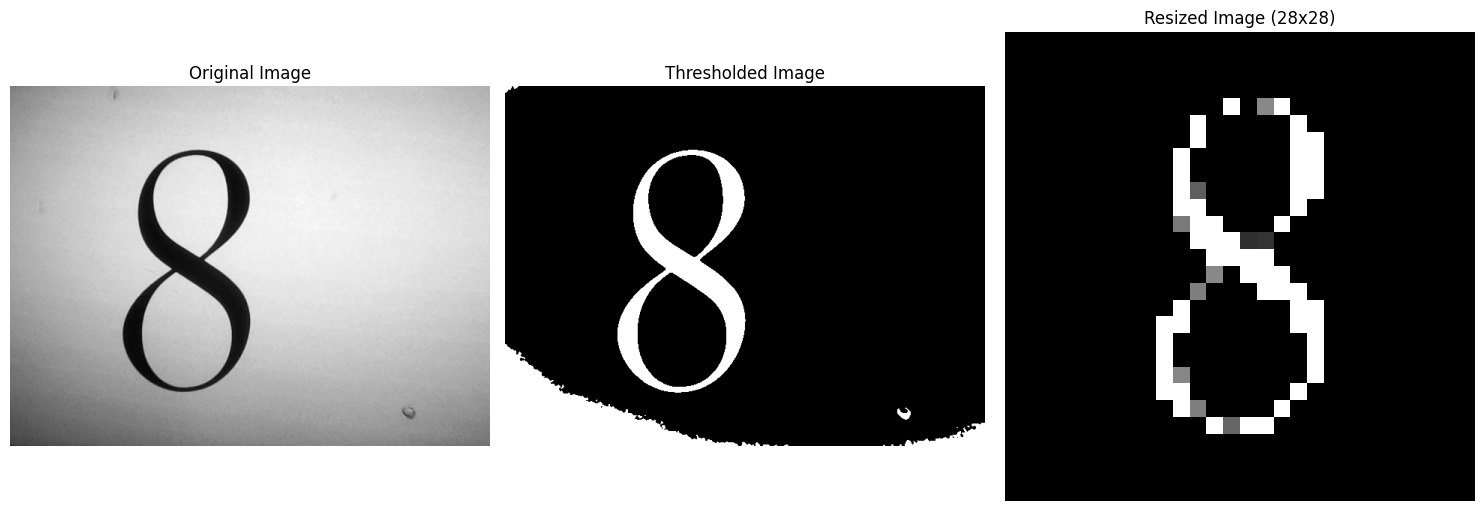

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Digit | Probability
-------------------
  0   |   0.00054
  1   |   0.00134
  2   |   0.00156
  3   |   0.00360
  4   |   0.03421
  5   |   0.00216
  6   |   0.00049
  7   |   0.00056
  8   |   0.95494
  9   |   0.00061
Predicción del modelo: 8
Etiqueta correcta: 8
Imagen 4 del dígito 8 capturada y preprocesada.


Presiona Enter para capturar imagen 5 del dígito 8...


<IPython.core.display.Javascript object>

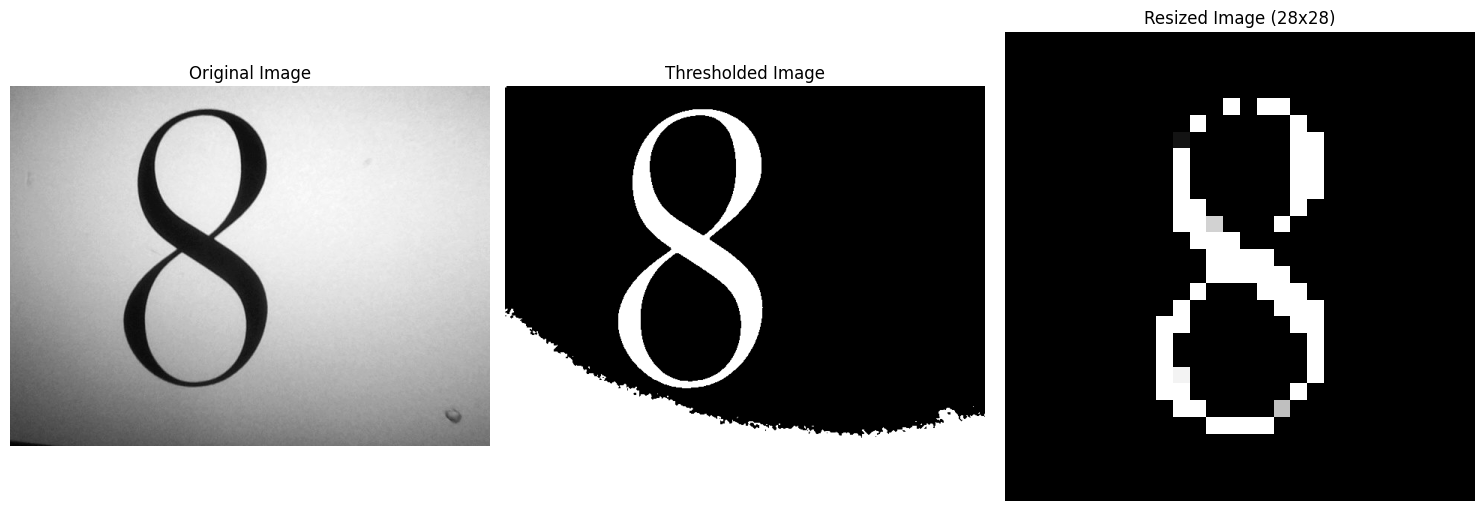

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Digit | Probability
-------------------
  0   |   0.00018
  1   |   0.00041
  2   |   0.00118
  3   |   0.00243
  4   |   0.06776
  5   |   0.00087
  6   |   0.00034
  7   |   0.00008
  8   |   0.92659
  9   |   0.00016
Predicción del modelo: 8
Etiqueta correcta: 8
Imagen 5 del dígito 8 capturada y preprocesada.


Dibuja el número 9 en una hoja y vamos a capturar 5 imágenes:

Presiona Enter para capturar imagen 1 del dígito 9...


<IPython.core.display.Javascript object>

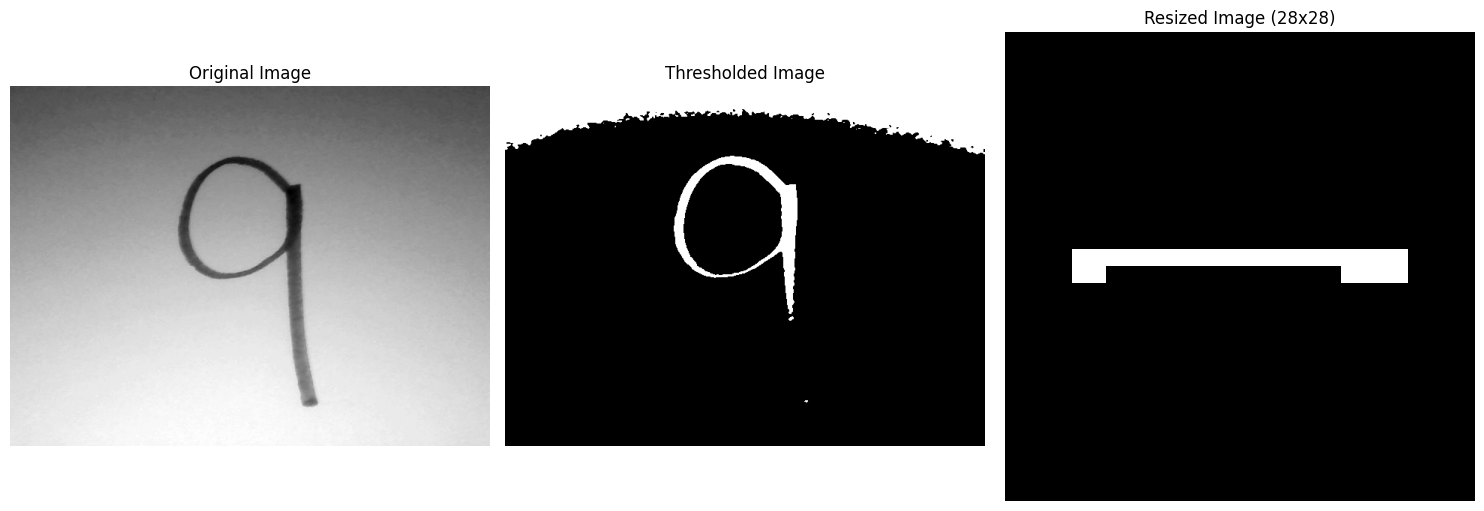

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Digit | Probability
-------------------
  0   |   0.00002
  1   |   0.00015
  2   |   0.00041
  3   |   0.00198
  4   |   0.90699
  5   |   0.01184
  6   |   0.00132
  7   |   0.06488
  8   |   0.00164
  9   |   0.01078
Predicción del modelo: 4
Etiqueta correcta: 9
Imagen 1 del dígito 9 capturada y preprocesada.


Presiona Enter para capturar imagen 2 del dígito 9...


<IPython.core.display.Javascript object>

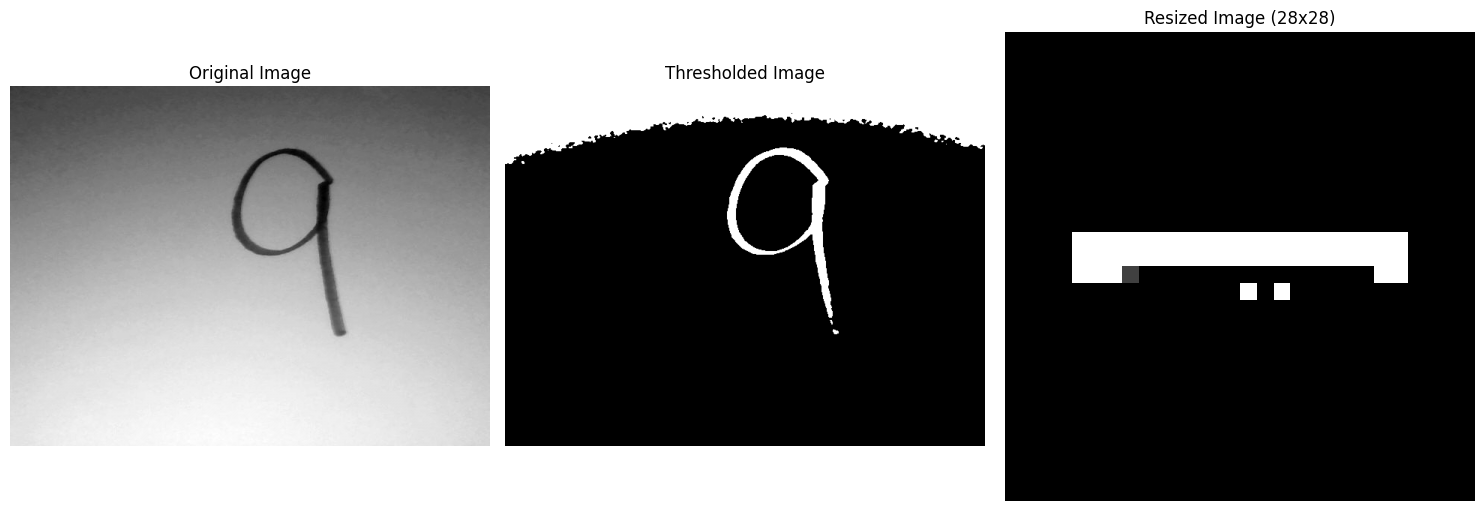

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00004
  2   |   0.00002
  3   |   0.00009
  4   |   0.93231
  5   |   0.00469
  6   |   0.00012
  7   |   0.05156
  8   |   0.00103
  9   |   0.01014
Predicción del modelo: 4
Etiqueta correcta: 9
Imagen 2 del dígito 9 capturada y preprocesada.


Presiona Enter para capturar imagen 3 del dígito 9...


<IPython.core.display.Javascript object>

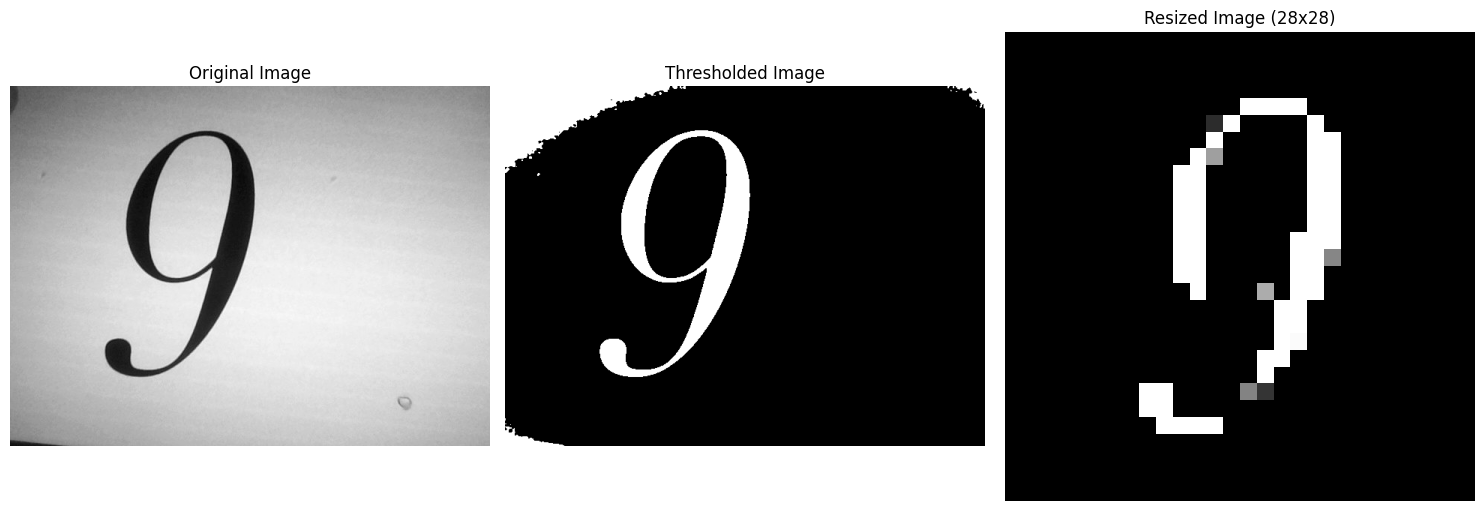

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Digit | Probability
-------------------
  0   |   0.05722
  1   |   0.00036
  2   |   0.01497
  3   |   0.00024
  4   |   0.27335
  5   |   0.00001
  6   |   0.00000
  7   |   0.63805
  8   |   0.00032
  9   |   0.01548
Predicción del modelo: 7
Etiqueta correcta: 9
Imagen 3 del dígito 9 capturada y preprocesada.


Presiona Enter para capturar imagen 4 del dígito 9...


<IPython.core.display.Javascript object>

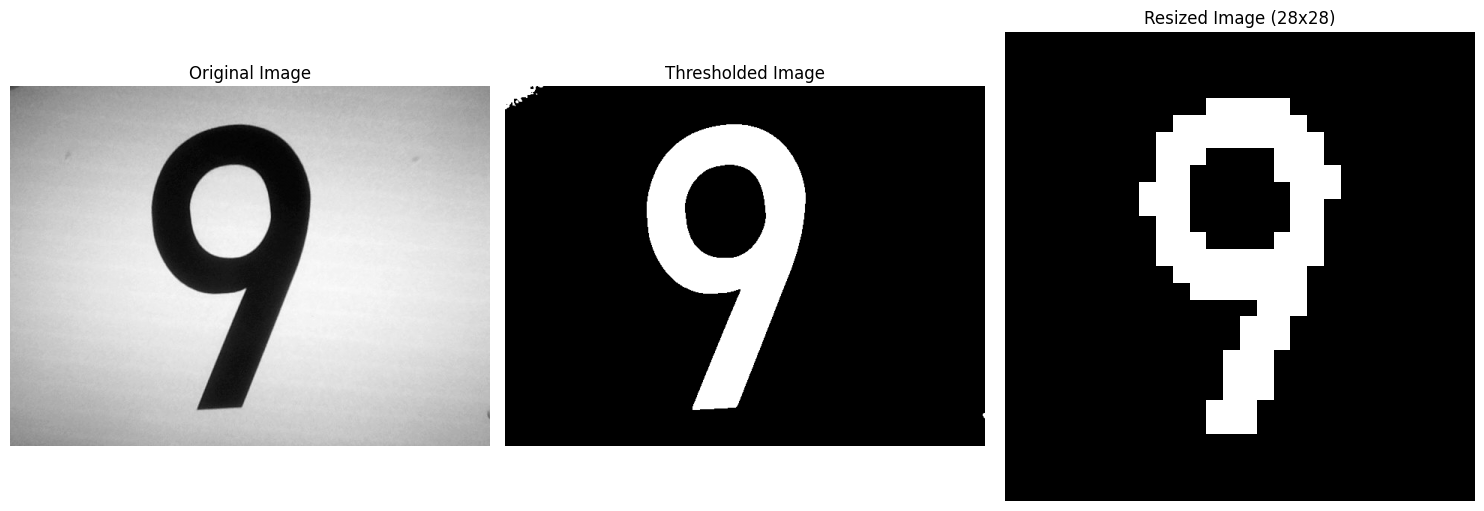

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00527
  4   |   0.00043
  5   |   0.00000
  6   |   0.00000
  7   |   0.00006
  8   |   0.15317
  9   |   0.84107
Predicción del modelo: 9
Etiqueta correcta: 9
Imagen 4 del dígito 9 capturada y preprocesada.


Presiona Enter para capturar imagen 5 del dígito 9...


<IPython.core.display.Javascript object>

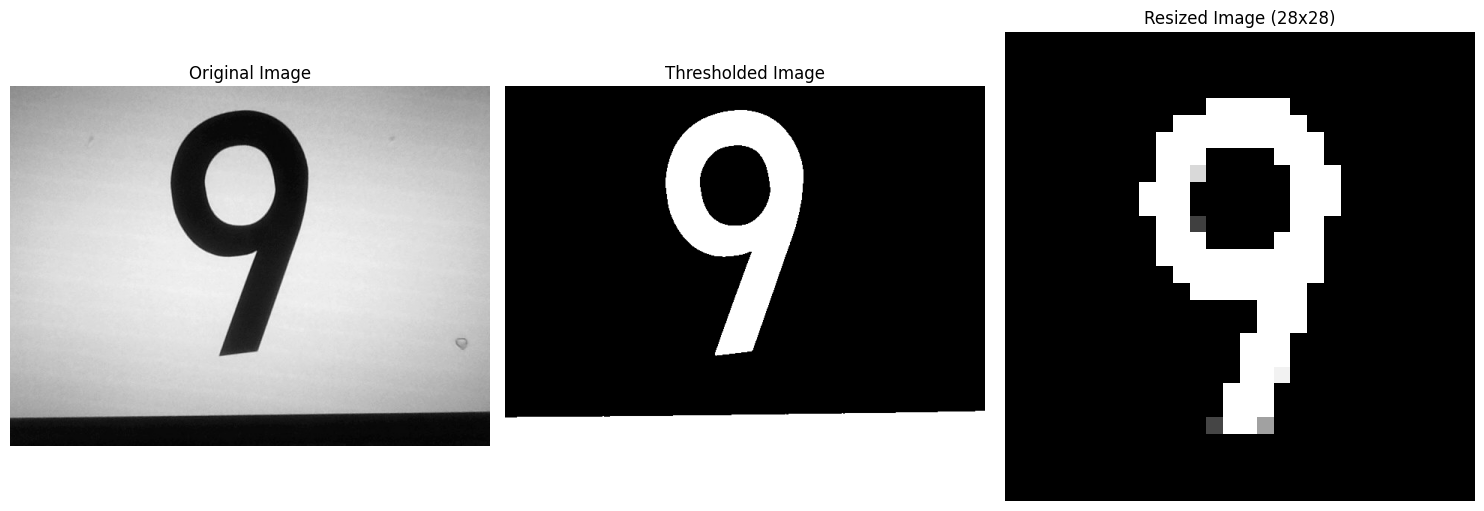

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.01417
  4   |   0.00062
  5   |   0.00000
  6   |   0.00000
  7   |   0.00001
  8   |   0.05018
  9   |   0.93503
Predicción del modelo: 9
Etiqueta correcta: 9
Imagen 5 del dígito 9 capturada y preprocesada.


--- Capturas terminadas ---

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Accuracy en tus 50 imágenes capturadas: 0.4600


In [ ]:

def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred = cv2.GaussianBlur(image, (5,5), 0)
    _, thresh = cv2.threshold(blurred, 105, 255, cv2.THRESH_BINARY_INV)

    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        roi = thresh[y:y+h, x:x+w]

        if w > h:
            pad = (w-h)//2
            roi = cv2.copyMakeBorder(roi, pad, pad, 0, 0, cv2.BORDER_CONSTANT, value=0)
        elif h > w:
            pad = (h-w)//2
            roi = cv2.copyMakeBorder(roi, 0, 0, pad, pad, cv2.BORDER_CONSTANT, value=0)

        roi = cv2.resize(roi, (20,20))
        final_img = np.zeros((28,28), dtype="uint8")
        final_img[4:24,4:24] = roi
    else:
        final_img = cv2.resize(thresh, (28,28))

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(thresh, cmap='gray')
    axes[1].set_title('Thresholded Image')
    axes[1].axis('off')
    axes[2].imshow(final_img, cmap='gray')
    axes[2].set_title('Resized Image (28x28)')
    axes[2].axis('off')
    plt.tight_layout()
    plt.show()

    final_img = final_img.astype('float32') / 255.0
    return final_img

captured_images = []
captured_labels = []

print("\n--- Vamos a capturar 5 imágenes de cada dígito (0 al 9) ---\n")

for digit in range(10):
    print(f"\nDibuja el número {digit} en una hoja y vamos a capturar 5 imágenes:")
    for sample in range(5):
        input(f"\nPresiona Enter para capturar imagen {sample+1} del dígito {digit}...")
        filename = take_photo()
        preprocessed_img = preprocess_image(filename)

        input_image = preprocessed_img.reshape(1, 28, 28, 1)
        prediction = model.predict(input_image)
        predicted_label = np.argmax(prediction)

        print("Digit | Probability")
        print("-------------------")
        for i, prob in enumerate(prediction[0]):
            print(f"  {i}   |   {prob:.5f}")
        print(f"Predicción del modelo: {predicted_label}")
        print(f"Etiqueta correcta: {digit}")

        captured_images.append(preprocessed_img)
        captured_labels.append(digit)
        print(f"Imagen {sample+1} del dígito {digit} capturada y preprocesada.\n")

captured_images = np.array(captured_images).reshape(-1,28,28,1)
captured_labels = np.array(captured_labels)

print("\n--- Capturas terminadas ---\n")

predictions = model.predict(captured_images)
predicted_labels = np.argmax(predictions, axis=1)

accuracy_captured = np.mean(predicted_labels == captured_labels)
print(f"Accuracy en tus 50 imágenes capturadas: {accuracy_captured:.4f}")

En este caso se evaluó el modelo sobre 50 imágenes que se capturaron manualmente, obteniendo como resultado final una exactitud de 46%, en comparación con una exacitud de prueba de 97% sobre el conjunto de MNIST original.

Esta diferencia se puede deber a factores como:
* Variaciones en la calidad de la imagen, ya sea diferencias en la ilumnación, resolución o desenfoque.
* Diferencias en estilo de escritura respecto a los datos de MNIST
* Errores en ppreprocesamiento como bordes no centrados o ruido adicional en la imagen.

Con esto es posible notar que el modelo puede reconocer algunos patrones en los datos reales, son embargo su rendimiento se ve afectado por las diferencias en las condiciones de captura resppecto al conjunto original.

***

**8.** Se guarda el modelo entrenado

In [ ]:
model.save('Numeros.h5')

**9.** Se incluye un script para correr en la computadora. Esto permite capturar video en vivo, preprocesamiento para cada frame y predicción para el dígito escrito.

In [ ]:
%%writefile real_time_prediction.py
import cv2
import numpy as np
import tensorflow as tf

model=tf.keras.models.load_model('Numeros.h5', compile=False)

cap=cv2.VideoCapture(0)

def preprocess(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred=cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh=cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY_INV)

    contours, _ =cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        largest_contour=max(contours, key=cv2.contourArea)
        x, y, w, h=cv2.boundingRect(largest_contour)

        roi = thresh[y:y+h, x:x+w]

        if w > h:
            pad=(w-h)//2
            roi=cv2.copyMakeBorder(roi, pad, pad, 0, 0, cv2.BORDER_CONSTANT, value=0)
        elif h > w:
            pad=(h-w)//2
            roi=cv2.copyMakeBorder(roi, 0, 0, pad, pad, cv2.BORDER_CONSTANT, value=0)

        roi=cv2.resize(roi, (20, 20))

        canvas=np.zeros((28, 28), dtype="uint8")
        canvas[4:24, 4:24] = roi

        canvas=canvas.astype('float32') / 255.0

        return canvas
    else:
        return None

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        processed = preprocess(frame)
        if processed is not None:
            input_img = processed.reshape(1, 28, 28, 1)
            prediction = model.predict(input_img)
            predicted_label = np.argmax(prediction)

            frame_with_prediction = cv2.putText(frame.copy(), str(predicted_label), (10, 30),
                                                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

            cv2.imshow('Real-time prediction', frame_with_prediction)

            upscaled_processed = cv2.resize(processed, (280, 280), interpolation=cv2.INTER_NEAREST)
            cv2.imshow('Processed Image', upscaled_processed)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    pass
finally:
    cap.release()
    cv2.destroyAllWindows()

Overwriting real_time_prediction.py
